# March Madness Machine Learning Project

Autor: Dominik Babić

Link na podatke: https://www.kaggle.com/datasets/nishaanamin/march-madness-data/data - Version 37

## Reprodukcija rezultata eksperimenata


Navedeni rad kao pristup rješavanja problema predviđanja vjerojatnosti pobjede određene ekipe uzima individualno uvažavanje varijabli koje statistički najviše koreliraju s postotkom pobjede, izračunavanje kvadratne regresijske funkcije nad njima te zatim očekivanje vjerojatni pobjede nad skupom izračunatih regresijskih vrijednosti.

Značajke koje su u radu određene kao najznačajnije su:
- Razlika u **RPI** rangiranju (*Rating Percentage Index*)
- Razlika u **BPI** (*Basketball Power Index*)
- Razlika u ukupnom broju poena (Razlika u ukupnom broju poena)
- Razlika u ukupnom broju ukradenih lopti (Razlika u ukupnom broju ukradenih lopti)
- Razlika u ukupnom broju blokada (Razlika u ukupnom broju blokada)
- Razlika u postotku šuta iz igre (Razlika u postotku šuta iz igre)

To su značajke koje su dostupne prije samih odigranih utakmica, tj. predstavljaju statistike timova kroz njihovu regularnu sezonu, što ih čini idealnim za korištenje pri predviđanju pobjednika. 

Naime, podaci o samoj utakmici nam neće pomoći jer su oni dostupni tek nakon što je utakmica odigrana, a cilj nam je predvidjeti pobjednika prije samog početka utakmice.

Ovo znanje iskoristit ćemo pri replikaciji eksperimenata iz rada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

Prvo ćemo izvući navedene značajke iz našeg skupa podataka te prikazati njihovu korelaciju s postotkom pobjede.
U tu svrhu iskoristit ćemo `Tournament Team Data (Including 2023).csv` i `Game Data.csv` datoteke za treniranje te `2023 Game Data.csv` za testiranje modela s obzirom da želimo izvesti predviđanja za timove koji su se kvalificirali u sezoni 2022./2023.

BPI vrijednosti za ekipe kroz godine dohvaćene su s ESPN-ovog API-ja te su spremljene u `bpi_data.csv` datoteku.

In [31]:
tournament_team_data = pd.read_csv('march-madness-data/Tournament Team Data (Including 2023).csv')
game_data_2023 = pd.read_csv('march-madness-data/2023 Game Data.csv')
bpi_data = pd.read_csv('march-madness-data/bpi_data.csv')

# Nekonzistentnost podataka skupljenih za BPI index s nazivima timova u ostalim skupovima
# bpi_data['TEAM'] = bpi_data['TEAM'].replace(r'\b(\w+\s*St)\b', r'\1.', regex=True)
# bpi_data['TEAM'] = bpi_data['TEAM'].str.replace('State', 'St.')
# bpi_data['TEAM'] = bpi_data['TEAM'].str.replace(r'\bMiami\b', 'Miami FL', regex=True)
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Fullerton', 'Cal St. Fullerton')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Jacksonville', 'Jacksonville St.')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('St Bonaventure', 'St. Bonaventure')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Texas A&M-CC', 'Texas A&M CC')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Santa Barbara', 'UC Santa Barbara')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Abilene Chrstn', 'Abilene Christian')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('E Washington', 'Eastern Washington')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Mount St. Marys', "Mount St. Mary's")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Virginia ', "Virginia")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("St John's", "St. John's")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Kentucky", "Northern Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Fair Dickinson", "Fairleigh Dickinson")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Gardner-Webb", "Gardner Webb")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Gardner-Webb", "Gardner Webb")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Dakota St.", "North Dakota St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC Central", "North Carolina Central")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC St.", "North Carolina St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Prairie View", "Prairie View A&M")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Charleston", "College of Charleston")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("SF Austin", "Stephen F. Austin")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Long Island", "LIU Brooklyn")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("MTSU", "Middle Tennessee")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("ETSU", "East Tennessee St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("FGCU", "Florida Gulf Coast")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Pitt", "Pittsburgh")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Little Rock", "Arkansas Little Rock")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Hawai'i", "Hawaii")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Bakersfield", "Cal St. Bakersfield")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("UAlbany", "Albany")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Coastal Car", "Coastal Carolina")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("UMass", "Massachusetts")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("G Washington", "George Washington")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("W Michigan", "Western Michigan")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Louisiana", "Louisiana Lafayette")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("E Kentucky", "Eastern Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N'Western St.", "Northwestern St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC A&T", "North Carolina A&T")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Western KY", "Western Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Detroit Mercy", "Detroit")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Miss Valley St.", "Mississippi Valley St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Colorado", "Northern Colorado")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Boston U", "Boston University")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Sam Houston", "Sam Houston St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("AR-Pine Bluff", "Arkansas Pine Bluff")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("CSU Northridge", "Cal St. Northridge")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("FAU", "Florida Atlantic")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("SE Missouri", "Southeast Missouri St.")
# bpi_data.to_csv('march-madness-data/bpi_data.csv', index=False)

tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Virginia ", "Virginia")
tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Mississippi", "Mississippi St.")
tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Texas A&M Corpus Chris", "Texas A&M CC")
game_data_2023['TEAM'] = game_data_2023['TEAM'].replace("Texas A&M Corpus Chris", "Texas A&M CC")

tournament_team_data = tournament_team_data.loc[:, ['YEAR', 'SEED', 'TEAM', 'WIN %', 'BLOCK %', 'EFG %', 'BARTHAG', 'DEFENSIVE REBOUND %', 'POINTS PER POSSESSION OFFENSE', 'ELITE SOS']]
tournament_team_data = tournament_team_data.merge(bpi_data, on=['YEAR', 'TEAM'], how='left')
game_data_2023 = game_data_2023.merge(bpi_data, on=['YEAR', 'TEAM'], how='left')

game_data_2023['WIN %'] = game_data_2023['WIN %']/100
tournament_team_data['WIN %'] = tournament_team_data['WIN %']/100

game_data_2023['EFG %'] = game_data_2023['EFG %']/100
tournament_team_data['EFG %'] = tournament_team_data['EFG %']/100

game_data_2023['DEFENSIVE REBOUND %'] = game_data_2023['DEFENSIVE REBOUND %']/100
tournament_team_data['DEFENSIVE REBOUND %'] = tournament_team_data['DEFENSIVE REBOUND %']/100

game_data_2023['BLOCK %'] = game_data_2023['BLOCK %']/100
tournament_team_data['BLOCK %'] = tournament_team_data['BLOCK %']/100

game_data_2023['ELITE SOS'] = game_data_2023['ELITE SOS']/100
tournament_team_data['ELITE SOS'] = tournament_team_data['ELITE SOS']/100

tournament_team_data.info()
tournament_team_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           1011 non-null   int64  
 1   SEED                           1011 non-null   int64  
 2   TEAM                           1011 non-null   object 
 3   WIN %                          1011 non-null   float64
 4   BLOCK %                        1011 non-null   float64
 5   EFG %                          1011 non-null   float64
 6   BARTHAG                        1011 non-null   float64
 7   DEFENSIVE REBOUND %            1011 non-null   float64
 8   POINTS PER POSSESSION OFFENSE  1011 non-null   float64
 9   ELITE SOS                      1011 non-null   float64
 10  BPI                            1011 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 87.0+ KB


,YEAR,SEED,WIN %,BLOCK %,EFG %,BARTHAG,DEFENSIVE REBOUND %,POINTS PER POSSESSION OFFENSE,ELITE SOS,BPI
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,2015.255193,8.768546,0.724841,0.105268,0.520228,0.797466,0.706550,1.087527,0.237716,9.312661
std,4.591874,4.673269,0.099629,0.028896,0.027119,0.168642,0.032271,0.049497,0.089777,6.165912
min,2008.000000,1.000000,0.366700,0.037000,0.419000,0.129000,0.607000,0.907000,0.050600,-16.000000
25%,2011.000000,5.000000,0.656300,0.085000,0.501000,0.743500,0.684000,1.055000,0.149250,5.800000
50%,2015.000000,9.000000,0.727300,0.102000,0.520000,0.860000,0.705000,1.088000,0.257000,10.100000
75%,2019.000000,13.000000,0.787900,0.124500,0.539000,0.914000,0.728000,1.122000,0.313450,13.500000
max,2023.000000,16.000000,1.000000,0.214000,0.610000,0.985000,0.814000,1.241000,0.416300,23.900000


In [27]:
game_data_2023 = game_data_2023.loc[:, ['YEAR', 'SEED', 'TEAM', 'WIN %', 'BLOCK %', 'EFG %', 'BARTHAG', 'DEFENSIVE REBOUND %', 'POINTS PER POSSESSION OFFENSE', 'ELITE SOS','BPI']]

game_data_2023.info()
game_data_2023.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           148 non-null    int64  
 1   SEED                           148 non-null    int64  
 2   TEAM                           148 non-null    object 
 3   WIN %                          148 non-null    float64
 4   BLOCK %                        148 non-null    float64
 5   EFG %                          148 non-null    float64
 6   BARTHAG                        148 non-null    float64
 7   DEFENSIVE REBOUND %            148 non-null    float64
 8   POINTS PER POSSESSION OFFENSE  148 non-null    float64
 9   ELITE SOS                      148 non-null    float64
 10  BPI                            148 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 12.8+ KB


,YEAR,SEED,WIN %,BLOCK %,EFG %,BARTHAG,DEFENSIVE REBOUND %,POINTS PER POSSESSION OFFENSE,ELITE SOS,BPI
count,148.0,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2023.0,6.567568,0.735265,0.103622,0.524750,0.847297,0.725838,1.096020,0.264862,11.058784
std,0.0,4.472383,0.097252,0.024768,0.023683,0.129397,0.028148,0.043223,0.075779,5.750598
min,2023.0,1.000000,0.375000,0.045000,0.462000,0.215000,0.627000,0.939000,0.051490,-9.200000
25%,2023.0,3.000000,0.656250,0.083000,0.512000,0.824000,0.710000,1.062000,0.236230,9.350000
50%,2023.0,6.000000,0.738615,0.100000,0.522000,0.884000,0.726500,1.096000,0.281280,11.700000
75%,2023.0,10.000000,0.812500,0.120250,0.535000,0.927000,0.745000,1.129000,0.306805,14.275000
max,2023.0,16.000000,0.911765,0.164000,0.586000,0.959000,0.782000,1.205000,0.384690,20.500000


Sada ćemo pokušati izvesti navedene značajke iz našeg skupa podataka te prikazati njihovu korelaciju s postotkom pobjede. Možemo primjetiti da neke od navedenih značajki nisu dostupne u skupu podataka, a nije ih moguće izračunati iz dostupnih podataka, one će biti zamijenjene sličnim značajkama koje su dostupne u skupu podataka (nisu dostupni BPI, RPI, ukupni blokovi, ukupni poeni i broj ukradenih lopti).

Prvi korak je diskretiziranje ishoda pobjednika i gubitnika utakmica čije podatke imamo u skupu podataka `Game Data.csv`. U tom skupu podataka svaka dva retka prikazuju podatke o jednoj utakmici.

In [43]:
game_data = pd.read_csv('march-madness-data/Game Data.csv')

new_columns = ['YEAR', 'TEAM 1', 'TEAM 2', 'TEAM 1 WIN', 'TEAM 1 LOCATION']
game_data['TEAM 1 WIN'] = game_data['TEAM 1 OUTCOME'].map({'W': 1, 'L': 0})
game_data = game_data.loc[:, new_columns]
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160226 entries, 0 to 160225
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   YEAR             160226 non-null  int64 
 1   TEAM 1           160226 non-null  object
 2   TEAM 2           160226 non-null  object
 3   TEAM 1 WIN       160226 non-null  int64 
 4   TEAM 1 LOCATION  160226 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.1+ MB


Sada ćemo u ovu tablicu nadodati podatke pobjednika i gubitnika za istu godinu iz tablice `Tournament Team Data (Including 2023).csv` te izračunati razliku u svim značajkama koje su nam dostupne. Osim toga, izračunat ćemo podatke koji nam nedostaju, a to je RPI index. RPI index je indeks koji se računa na temelju pobjeda i poraza ekipe, kao i pobjeda i poraza protivnika ekipe. Ovaj indeks je dostupan za svaku ekipu u tablici `Tournament Team Data (Including 2023).csv` te ćemo ga iskoristiti za izračun RPI indeksa za svaku utakmicu u tablici `Game Data.csv`.

In [47]:
merged_data = pd.merge(game_data, tournament_team_data, how='inner', left_on=['YEAR', 'TEAM 1'], right_on=['YEAR', 'TEAM'])

merged_data.rename(columns={
    'SEED': 'TEAM 1 SEED',
    'WIN %': 'TEAM 1 WIN %',
    'BLOCK %': 'TEAM 1 BLOCK %',
    'EFG %': 'TEAM 1 EFG %',
    'BARTHAG': 'TEAM 1 BARTHAG',
    'DEFENSIVE REBOUND %': 'TEAM 1 DEFENSIVE REBOUND %',
    'POINTS PER POSSESSION OFFENSE': 'TEAM 1 POINTS PER POSSESSION OFFENSE',
    'ELITE SOS': 'TEAM 1 ELITE SOS',
    'BPI': 'TEAM 1 BPI'
}, inplace=True)
merged_data = merged_data.drop(["TEAM"], axis=1)

merged_data = pd.merge(merged_data, tournament_team_data, how='inner', left_on=['YEAR', 'TEAM 2'], right_on=['YEAR', 'TEAM'])

merged_data.rename(columns={
    'SEED': 'TEAM 2 SEED',
    'WIN %': 'TEAM 2 WIN %',
    'BLOCK %': 'TEAM 2 BLOCK %',
    'EFG %': 'TEAM 2 EFG %',
    'BARTHAG': 'TEAM 2 BARTHAG',
    'DEFENSIVE REBOUND %': 'TEAM 2 DEFENSIVE REBOUND %',
    'POINTS PER POSSESSION OFFENSE': 'TEAM 2 POINTS PER POSSESSION OFFENSE',
    'ELITE SOS': 'TEAM 2 ELITE SOS',
    'BPI': 'TEAM 2 BPI'
}, inplace=True)
merged_data = merged_data.drop(["TEAM"], axis=1)

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   YEAR                                  10320 non-null  int64  
 1   TEAM 1                                10320 non-null  object 
 2   TEAM 2                                10320 non-null  object 
 3   TEAM 1 WIN                            10320 non-null  int64  
 4   TEAM 1 LOCATION                       10320 non-null  object 
 5   TEAM 1 SEED                           10320 non-null  int64  
 6   TEAM 1 WIN %                          10320 non-null  float64
 7   TEAM 1 BLOCK %                        10320 non-null  float64
 8   TEAM 1 EFG %                          10320 non-null  float64
 9   TEAM 1 BARTHAG                        10320 non-null  float64
 10  TEAM 1 DEFENSIVE REBOUND %            10320 non-null  float64
 11  TEAM 1 POINTS P

Sada ćemo isti postupak provesti nad tablicom `2023 Game Data.csv` kako bismo dobili podatke za testiranje prediktivnih sposobnosti modela. Te podatke ćemo zatim spojiti s ostalim podacima, kako bi za svaku utakmicu mogli izračunati RPI indeks.

In [49]:
cols = merged_data.columns
new_game_data_rows = []

for i in range(0, len(game_data_2023), 2):
    team1_row = game_data_2023.iloc[i]
    team2_row = game_data_2023.iloc[i + 1]
    
    # TEAM 1 WIN cu u ovim podacima postaviti na 0, ali kasnije ću ih opet izdvojiti od onih za treniranje pa nam to 
    new_row = [team1_row['YEAR'], team1_row['TEAM'], team2_row['TEAM'], 0, 'N', team1_row['SEED'],
               team1_row['WIN %'], team1_row['BLOCK %'], team1_row['EFG %'], team1_row['BARTHAG'], 
               team1_row['DEFENSIVE REBOUND %'], team1_row['POINTS PER POSSESSION OFFENSE'], 
               team2_row['ELITE SOS'], team1_row['BPI'], team2_row['SEED'], team2_row['WIN %'], 
               team2_row['BLOCK %'], team2_row['EFG %'], team2_row['BARTHAG'], team2_row['DEFENSIVE REBOUND %'], 
               team2_row['POINTS PER POSSESSION OFFENSE'], team2_row['ELITE SOS'], team2_row['BPI']]

    new_game_data_rows.append(new_row)

test_game_data = pd.DataFrame(new_game_data_rows, columns=cols)

RPI indeks je indeks koji se računa na temelju pobjeda i poraza ekipe, kao i pobjeda i poraza protivnika ekipe. Opća formula za izračun RPI indeksa je:
$$
RPI = 0.25 * WP + 0.5 * OWP + 0.25 * OOWP
$$
gdje:
- WP predstavlja postotak pobjeda ekipe
- OWP predstavlja prosječni postotak pobjeda protivnika ekipe
- OOWP predstavlja prosječni postotak pobjeda protivnika protivnika ekipe

Protivnički postotak pobjeda i postotak pobjeda protivnika tih protivnika čine snagu rasporeda (SOS). Stoga, SOS čini 75% RPI izračuna.
Znajući to, RPI indeks možemo izračunati na sljedeći način:
$$
RPI = 0.25 * WP + 0.75 * SOS
$$

U sljedećim odlomcima koda, izveo sam oba pristupa računanja RPI indeksa.

In [50]:
owp_data = merged_data.groupby(['YEAR', 'TEAM 1']).agg({'TEAM 2 WIN %': 'mean'}).reset_index()
owp_data = owp_data.rename(columns={'TEAM 2 WIN %': 'OWP TEAM 1', 'TEAM 1': 'TEAM'})

owp_data_2 = merged_data.groupby(['YEAR', 'TEAM 2']).agg({'TEAM 1 WIN %': 'mean'}).reset_index()
owp_data_2 = owp_data_2.rename(columns={'TEAM 1 WIN %': 'OWP TEAM 2', 'TEAM 2': 'TEAM'})

owp_merged_data = pd.merge(owp_data, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'TEAM 1'], how='left', suffixes=('', '_1'))
owp_merged_data = pd.merge(owp_data_2, owp_merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'TEAM 2'], how='left', suffixes=('', '_2'))

oowp_data = owp_merged_data.groupby(['YEAR', 'TEAM 1']).agg({'OWP TEAM 2': 'mean'}).reset_index()
oowp_data = oowp_data.rename(columns={'OWP TEAM 2': 'OOWP TEAM 1', 'TEAM 1': 'TEAM'})

oowp_data_2 = owp_merged_data.groupby(['YEAR', 'TEAM 2']).agg({'OWP TEAM 1': 'mean'}).reset_index()
oowp_data_2 = oowp_data_2.rename(columns={'OWP TEAM 1': 'OOWP TEAM 2', 'TEAM 2': 'TEAM'})

oowp_merged_data = pd.merge(oowp_data, owp_merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'TEAM 1'], how='left', suffixes=('', '__1'))
oowp_merged_data = pd.merge(oowp_data_2, oowp_merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'TEAM 2'], how='left', suffixes=('', '__2'))

oowp_merged_data['RPI TEAM 1'] = (0.25 * oowp_merged_data['TEAM 1 WIN %']) + (0.50 * oowp_merged_data['OWP TEAM 1']) + (0.25 * oowp_merged_data['OOWP TEAM 1'])
oowp_merged_data['RPI TEAM 2'] = (0.25 * oowp_merged_data['TEAM 2 WIN %']) + (0.50 * oowp_merged_data['OWP TEAM 2']) + (0.25 * oowp_merged_data['OOWP TEAM 2'])

oowp_merged_data = oowp_merged_data.loc[:, ['YEAR', 'TEAM 1', 'TEAM 2', 'TEAM 1 WIN', 'TEAM 1 LOCATION', 'TEAM 1 SEED', 'TEAM 1 WIN %', 'TEAM 1 BLOCK %', 'TEAM 1 EFG %', 'TEAM 1 BARTHAG', 'TEAM 1 DEFENSIVE REBOUND %', 'TEAM 1 POINTS PER POSSESSION OFFENSE', 'TEAM 1 ELITE SOS', 'TEAM 1 BPI', 'RPI TEAM 1', 'TEAM 2 SEED', 'TEAM 2 WIN %', 'TEAM 2 BLOCK %', 'TEAM 2 EFG %', 'TEAM 2 BARTHAG', 'TEAM 2 DEFENSIVE REBOUND %', 'TEAM 2 POINTS PER POSSESSION OFFENSE', 'TEAM 2 ELITE SOS', 'TEAM 2 BPI', 'RPI TEAM 2']]
merged_data = oowp_merged_data
merged_data.describe()

test_game_data['RPI TEAM 1'] = 0.25 * test_game_data['TEAM 1 WIN %'] + 0.75 * test_game_data['TEAM 1 ELITE SOS']
test_game_data['RPI TEAM 2'] = 0.25 * test_game_data['TEAM 2 WIN %'] + 0.75 * test_game_data['TEAM 2 ELITE SOS']

### Računanje RPI indeksa koristeći WP i SOS

In [8]:
merged_data['RPI TEAM 1'] = 0.25 * merged_data['TEAM 1 WIN %'] + 0.75 * merged_data['TEAM 1 ELITE SOS']
merged_data['RPI TEAM 2'] = 0.25 * merged_data['TEAM 2 WIN %'] + 0.75 * merged_data['TEAM 2 ELITE SOS']

test_game_data['RPI TEAM 1'] = 0.25 * test_game_data['TEAM 1 WIN %'] + 0.75 * test_game_data['TEAM 1 ELITE SOS']
test_game_data['RPI TEAM 2'] = 0.25 * test_game_data['TEAM 2 WIN %'] + 0.75 * test_game_data['TEAM 2 ELITE SOS']

Sada možemo izračunati razlike u statistikama za svaku utakmicu kako bismo dobili značajke koje ćemo koristiti za treniranje modela.

In [51]:
merged_data['EFG % DIFF'] = merged_data['TEAM 1 EFG %'] - merged_data['TEAM 2 EFG %']
merged_data['BLOCK % DIFF'] = merged_data['TEAM 1 BLOCK %'] - merged_data['TEAM 2 BLOCK %']
merged_data['BPI DIFF'] = merged_data['TEAM 1 BPI'] - merged_data['TEAM 2 BPI']
merged_data['RPI DIFF'] = merged_data['RPI TEAM 1'] - merged_data['RPI TEAM 2']
merged_data['PPPO DIFF'] = merged_data['TEAM 1 POINTS PER POSSESSION OFFENSE'] - merged_data['TEAM 2 POINTS PER POSSESSION OFFENSE']
merged_data['DEFENSIVE REBOUND % DIFF'] = merged_data['TEAM 1 DEFENSIVE REBOUND %'] - merged_data['TEAM 2 DEFENSIVE REBOUND %']
merged_data['WIN % DIFF'] = merged_data['TEAM 1 WIN %'] - merged_data['TEAM 2 WIN %']

test_game_data['EFG % DIFF'] = test_game_data['TEAM 1 EFG %'] - test_game_data['TEAM 2 EFG %']
test_game_data['BLOCK % DIFF'] = test_game_data['TEAM 1 BLOCK %'] - test_game_data['TEAM 2 BLOCK %']
test_game_data['BPI DIFF'] = test_game_data['TEAM 1 BPI'] - test_game_data['TEAM 2 BPI']
test_game_data['RPI DIFF'] = test_game_data['RPI TEAM 1'] - test_game_data['RPI TEAM 2']
test_game_data['PPPO DIFF'] = test_game_data['TEAM 1 POINTS PER POSSESSION OFFENSE'] - test_game_data['TEAM 2 POINTS PER POSSESSION OFFENSE']
test_game_data['DEFENSIVE REBOUND % DIFF'] = test_game_data['TEAM 1 DEFENSIVE REBOUND %'] - test_game_data['TEAM 2 DEFENSIVE REBOUND %']
test_game_data['WIN % DIFF'] = test_game_data['TEAM 1 WIN %'] - test_game_data['TEAM 2 WIN %']

merged_data.describe()

,YEAR,TEAM 1 WIN,TEAM 1 SEED,TEAM 1 WIN %,TEAM 1 BLOCK %,TEAM 1 EFG %,TEAM 1 BARTHAG,TEAM 1 DEFENSIVE REBOUND %,TEAM 1 POINTS PER POSSESSION OFFENSE,TEAM 1 ELITE SOS,...,TEAM 2 ELITE SOS,TEAM 2 BPI,RPI TEAM 2,EFG % DIFF,BLOCK % DIFF,BPI DIFF,RPI DIFF,PPPO DIFF,DEFENSIVE REBOUND % DIFF,WIN % DIFF
count,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,...,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,1.032000e+04,1.032000e+04,1.032000e+04,1.032000e+04,1.032000e+04
mean,2014.643217,0.500000,6.751453,0.730817,0.110224,0.520978,0.864596,0.704333,1.094527,0.283355,...,0.283355,11.671919,0.730817,0.000000,0.000000,-1.101617e-17,1.398537e-19,1.721276e-19,4.303190e-20,-1.721276e-19
std,4.186934,0.500024,4.094336,0.095922,0.029373,0.026483,0.113295,0.031048,0.048245,0.070754,...,0.070754,5.315223,0.032737,0.036179,0.040991,7.278582e+00,3.351823e-02,6.581173e-02,3.602134e-02,1.370027e-01
min,2008.000000,0.000000,1.000000,0.366700,0.037000,0.419000,0.129000,0.607000,0.907000,0.050600,...,0.050600,-16.000000,0.557817,-0.143000,-0.143000,-3.450000e+01,-1.569005e-01,-2.430000e-01,-1.440000e-01,-6.333000e-01
25%,2011.000000,0.000000,3.000000,0.656300,0.090000,0.502000,0.846000,0.684000,1.061000,0.245800,...,0.245800,9.200000,0.707298,-0.024000,-0.027000,-4.100000e+00,-2.126952e-02,-4.400000e-02,-2.500000e-02,-9.370000e-02
50%,2015.000000,0.500000,6.000000,0.735300,0.107000,0.520000,0.893000,0.703000,1.093000,0.301700,...,0.301700,11.900000,0.730409,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2018.000000,1.000000,10.000000,0.787900,0.129000,0.539000,0.930000,0.725000,1.127000,0.331400,...,0.331400,15.000000,0.753281,0.024000,0.027000,4.100000e+00,2.126952e-02,4.400000e-02,2.500000e-02,9.370000e-02
max,2022.000000,1.000000,16.000000,1.000000,0.214000,0.610000,0.985000,0.814000,1.241000,0.416300,...,0.416300,23.900000,0.846512,0.143000,0.143000,3.450000e+01,1.569005e-01,2.430000e-01,1.440000e-01,6.333000e-01


Prikazat ćemo sada distribucije svih značajki koje ćemo koristiti za treniranje modela s obzirom na ishod utakmice kako bi mogli vidjeti koliko će nam te značajke možda utjecati na predviđanje ishoda utakmice.

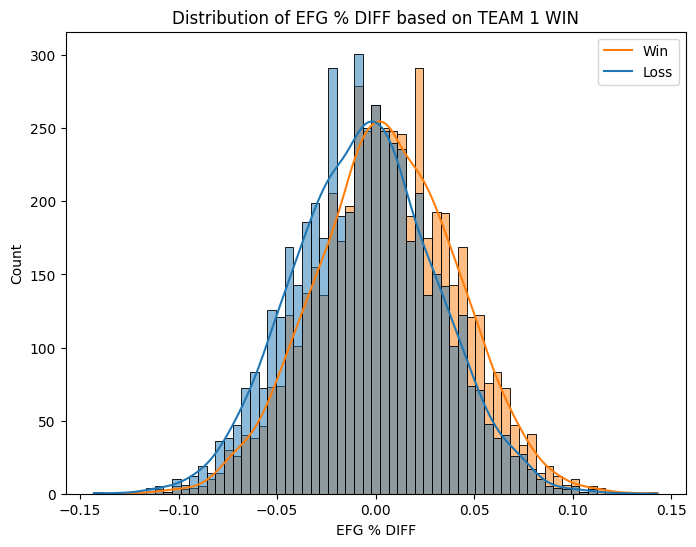

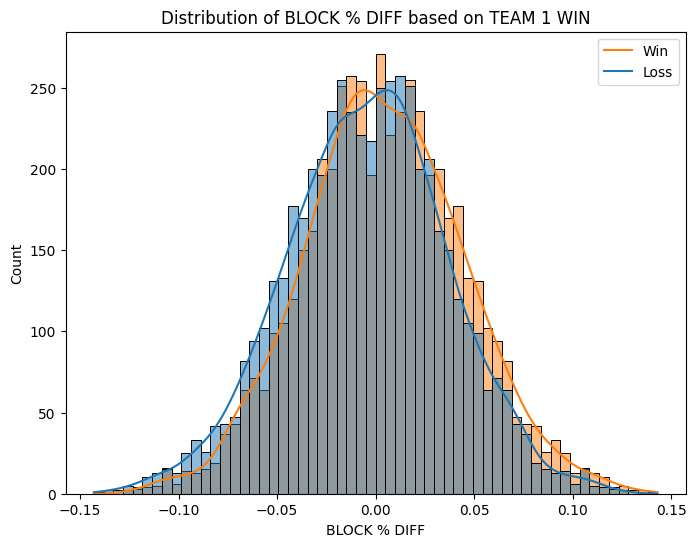

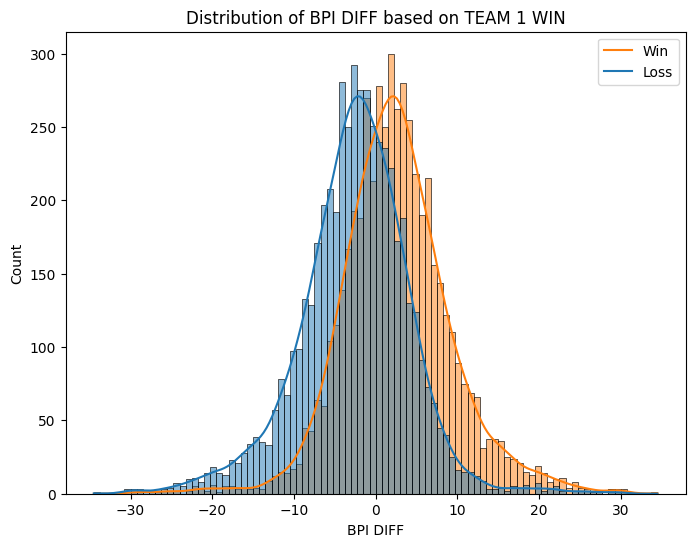

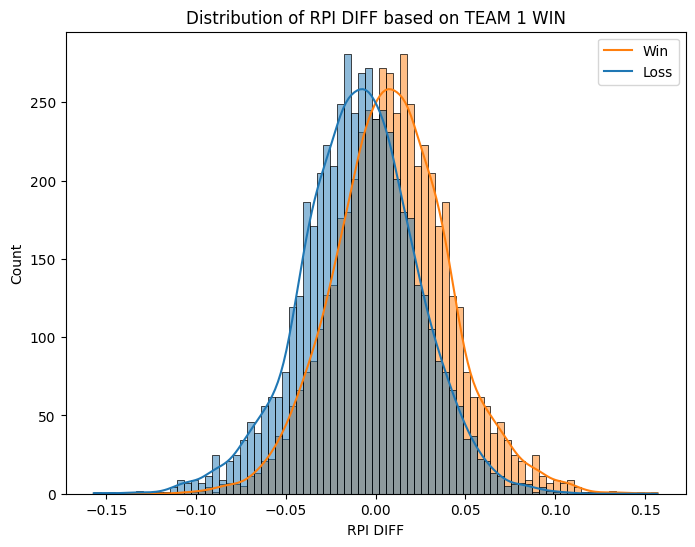

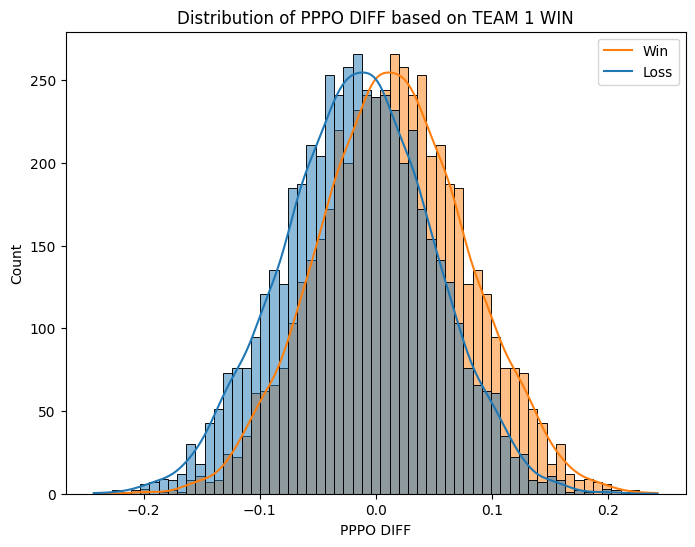

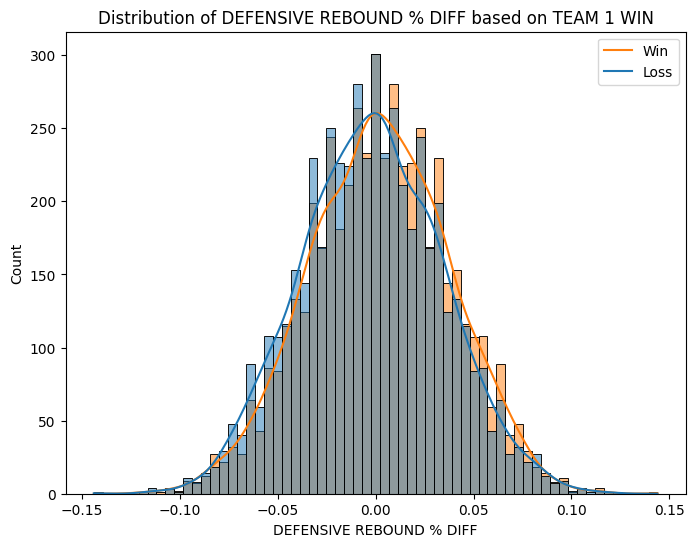

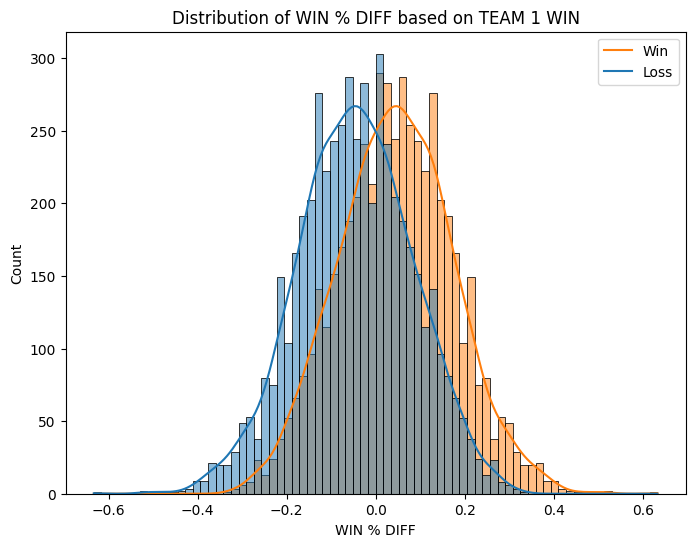

In [58]:
features = ['EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'RPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF', 'WIN % DIFF']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=merged_data, x=feature, hue='TEAM 1 WIN', kde=True)
    plt.title(f'Distribution of {feature} based on TEAM 1 WIN')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['Win', 'Loss'])
    plt.show()

## Primjedbama na znanstveni rad i replikacija rezultata

U samom radu slabo je razrađeno što su oni zapravo koristili kao izlaz pri treniranju, kako su obradili podatke te kako su evaluirali izlaze modela kod treniranja.
Naime, može se primjetiti kako je ovo primjer zadatka za model logističke regresije gdje izlaz modela definira pobjedu odnosno poraz, no u radu je korišten ansamblovski model linearnih regresija, što je prilično neobično s obzirom na to da je izlaz modela (poraz/pobjeda) binarna varijabla. Jedan od glavnih nedostataka linearnih modela je taj što njihov izlaz ne mora biti u intervalu [0, 1], što je slučaj kod logističke regresije. 
No, problem kod logističke regresije je taj što je to model koji se koristi za klasifikaciju, a ne za regresiju, što je slučaj kod ovog zadatka. Model logističke regresije bi se mogao iskoristiti za predviđanje pobjednika, no taj pristup nije razrađen u radu.

**U radu nije jasno određeno kako su računali stvarne izlazne vjerojatnosti pobjede odnosno poraza, što stvara probleme.** 
Zato ćemo odraditi dva pristupa:
- Ciljanu brojčanu vrijednost definiramo kao binarnu varijablu koja predstavlja pobjedu odnosno poraz.
- Ciljanu brojčanu vrijednost definiramo kao statistika postotka pobjeda ekipe `TEAM 1`.

Za svaki od slučajeva istrenirat ćemo jedan ansambl modela kvadratne linearne regresije (kojoj ćemo izlaz ograničiti na interval [0, 1]).

Sada ćemo pristupiti problem predviđanja pobjednika tako da ćemo za izlaz modela koristiti podatak pobjede odnosno poraza, a ne razliku postotak pobjeda. Primjeniti ćemo ansamblovski model linearnih regresija te ćemo evaluirati njegove izlaze, a prilikom poboljšanja rezultata, pokušat ćemo koristiti i druge modele (logističku regresiju ili neke druge klasifikacijske modele).


### Prvi pristup
Značajka s kojom ćemo uspoređivati rezultate modela bit će **ishod utakmice (pojeda = 1, poraz = 0)**.

In [53]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import log_loss, ConfusionMatrixDisplay, RocCurveDisplay

np.random.seed(134)

In [74]:
def probability_linear(test_data, models, polys, features):
    prob = []

    for model, poly, feature in zip(models, polys, features):
        X_test = np.array(test_data[feature]).reshape(-1, 1)
        X_test_poly = poly.transform(X_test)
        prob.append(model.predict(X_test_poly)[0])

    return np.mean(prob)

features = ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF']
polys = []
linear_models =[]
win_data = merged_data[merged_data['TEAM 1 WIN'] == 1].sample(n=4000)
loss_data = merged_data[merged_data['TEAM 1 WIN'] == 0].sample(n=4000)
train_data = pd.concat([win_data, loss_data])
np.random.shuffle(train_data.values)

for v in features:
    poly = PolynomialFeatures(degree=2)
    X_train = train_data[v].values.reshape(-1, 1)
    X_train_poly = poly.fit_transform(X_train)
    
    lin_model = Ridge(alpha=0.5)
    lin_model.fit(X_train_poly, train_data['TEAM 1 WIN'])

    polys.append(poly)
    linear_models.append(lin_model)

Iscrtat ćemo sada graf koji prikazuje graf predikcije modela s obzirom na promatrane značajke.

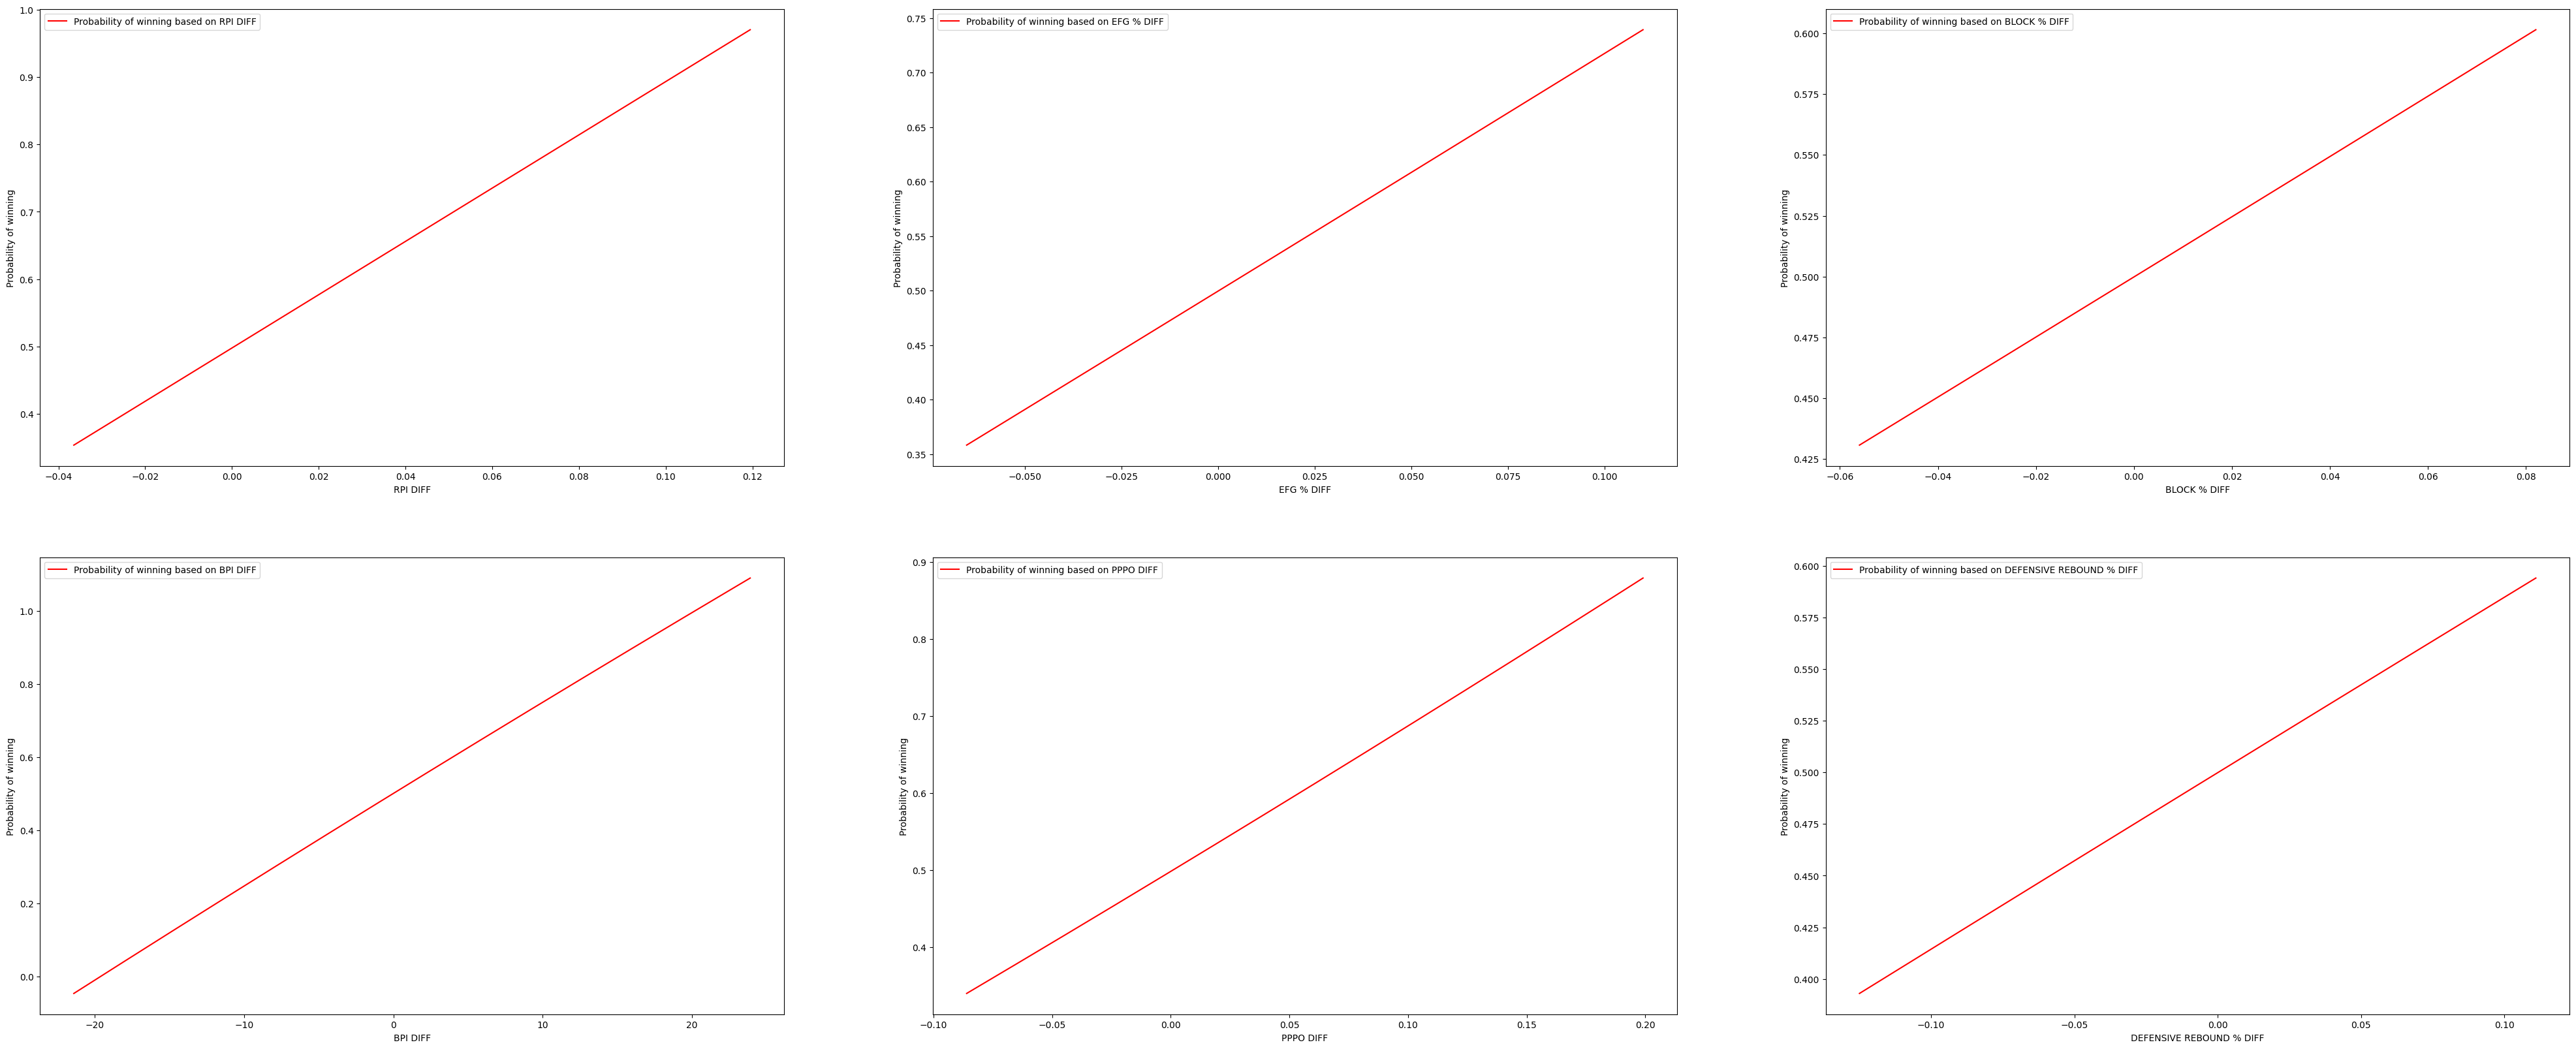

In [75]:
x_test = test_game_data.copy()

f, ax = plt.subplots(2, 3, figsize=(50, 20))
for i, (model, poly, feature) in enumerate(zip(linear_models, polys, ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF'])):
    x_test[feature] = x_test[feature]
    x = np.linspace(x_test[feature].min(), x_test[feature].max(), 1000)
    x_poly = poly.transform(x.reshape(-1, 1))
    ax[i//3, i%3].plot(x, model.predict(x_poly), c='r', label='Probability of winning based on ' + feature)
    ax[i//3, i%3].legend(loc='best')
    ax[i//3, i%3].set_xlabel(feature)
    ax[i//3, i%3].set_ylabel('Probability of winning')

Na prikazanim grafovima možemo uočiti kako se modeli ponašaju. Možemo primjetiti kako model kvadratne linearne regresije daje neke rezultate koji bi se mogli interpretirati kao vjerojatnost ekipe `TEAM 1` da pobijedi ekipu `TEAM 2`, dok model logističke regresije daje rezultate koji se mogu interpretirati kao vjerojatnost ekipe `TEAM 1` da pobijedi ekipu `TEAM 2` (zbog vrijednosti iz intervala [0, 1]), no tu se vrijednost izlaza može više interpretirati u kontekstu klasifikacije, a ne regresije, tj hoče li ekipa `TEAM 1` pobijediti ekipu `TEAM 2` ili neće.

***U ovom slučaju se može koristiti i gubitak "binary cross entropy".***
Log-loss funkcija je funkcija koja se koristi za evaluaciju modela logističke regresije. Ona je definirana kao:
$$
L = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(p_i) + (1-y_i)\log(1-p_i)
$$
gdje:
- $N$ predstavlja broj primjera
- $y_i$ predstavlja stvarnu vrijednost izlaza modela
- $p_i$ predstavlja predviđenu vrijednost izlaza modela

Vrijednost log-loss gubitka rješenja rada jednaka je 0.56411, dok su vrijednosti log-loss gubitka rješenja ovog rada oko 0.69. To je suboptimalan rezultat, no to je zato što se može dosta toga poboljšati u samom pristupu rješavanja ovog problema.

Ono što je također vidljivo jest da oba modela ne daju uvjerljive predikcije vjerojatnosti pobjede određene ekipe, tj. vjerojatnosti koje su gotove jednake slučajnom odabiru.

In [76]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: probability_linear(x, linear_models, polys, features), axis=1)
print(f'Linear regression accuracy on training data: {log_loss(random_matchups["TEAM 1 WIN"], random_matchups["PREDICTED TEAM 1 WIN"])}')
print(random_matchups.sample(10)[['TEAM 1', 'TEAM 2', 'PREDICTED TEAM 1 WIN', 'TEAM 1 WIN']])

Linear regression accuracy on training data: 0.6514679532634977
                      TEAM 1        TEAM 2  PREDICTED TEAM 1 WIN  TEAM 1 WIN
6423                  Baylor         Texas              0.552685           1
8901                    Iowa     Wisconsin              0.510580           0
9096                Virginia  Georgia Tech              0.564973           1
3943                Bucknell      La Salle              0.529675           1
5917       Stephen F. Austin        Baylor              0.521088           0
10175               Arkansas     Tennessee              0.476480           0
8452                Kentucky           LSU              0.547936           0
7746                Virginia      Miami FL              0.586140           1
8168   College of Charleston   Wichita St.              0.409874           0
5305                Arkansas       Georgia              0.526113           1


Još ćemo prikazati i matricu zabune i ROC krivulju (gledano za problem određivanja pobjede/poraza) za oba modela.

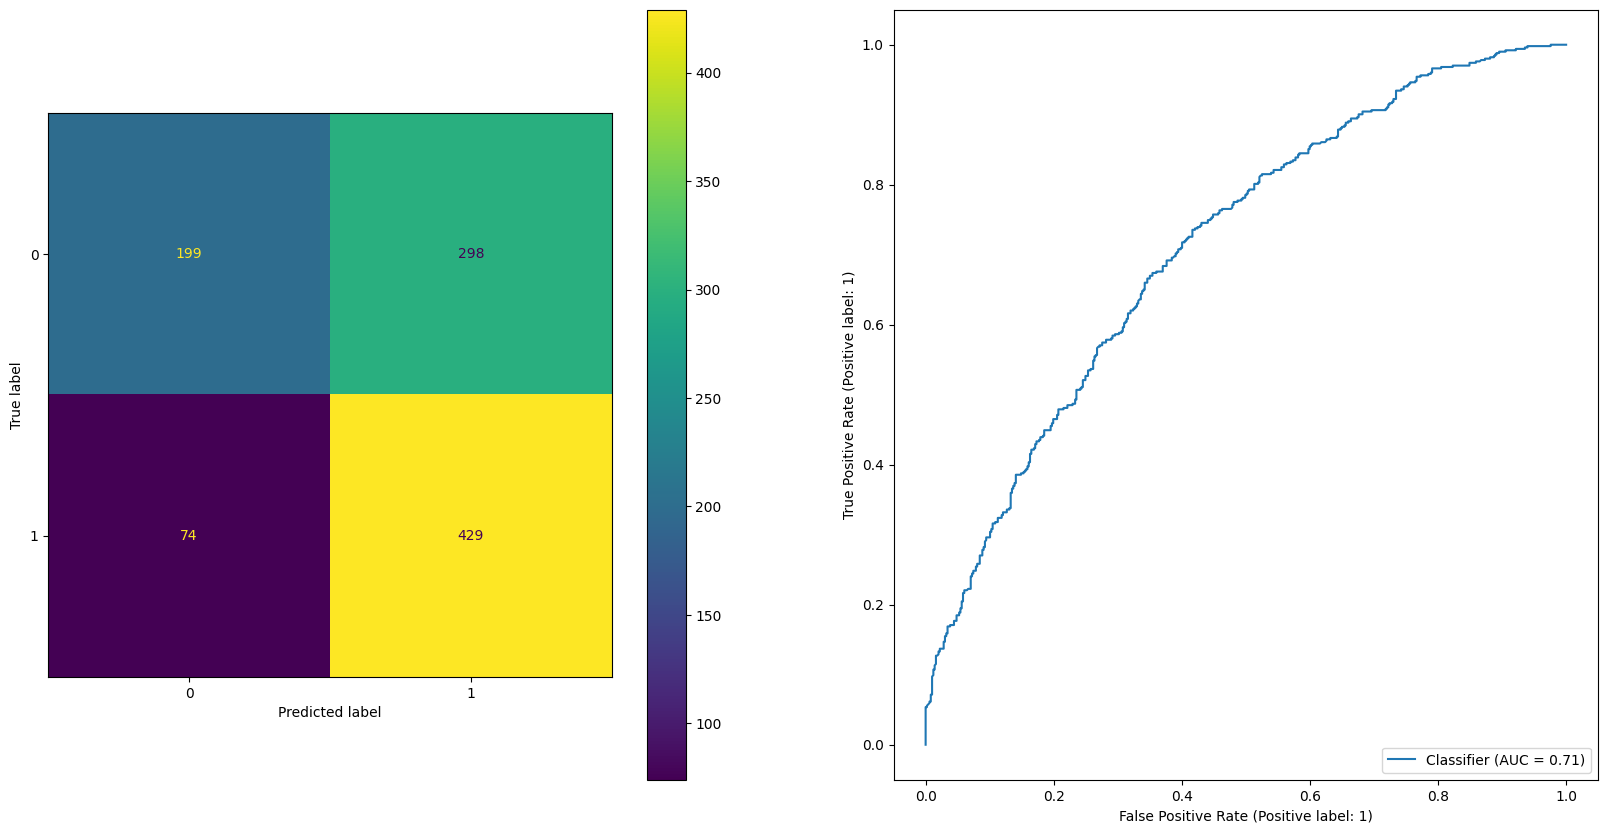

In [87]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: probability_linear(x, linear_models, polys, features), axis=1)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'] > 0.5, ax=ax[0])
RocCurveDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'], ax=ax[1])

Ovakvi rezultati nisu previše zadovoljavajući, a to sve zbog toga što je pristup rješavanja problema nije dovoljno dobar. U sljedećem koraku ćemo pokušati poboljšati rezultate.

### Drugi pristup

Značajka s kojom ćemo uspoređivati rezultate modela bit će **postotak pobjeda**.

In [78]:
features = ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF']

polys = []
linear_models =[]
win_data = merged_data[merged_data['TEAM 1 WIN'] == 1].sample(n=4000)
loss_data = merged_data[merged_data['TEAM 1 WIN'] == 0].sample(n=4000)
loss_data['TEAM 1 WIN %'] = 1 - loss_data['TEAM 1 WIN %']
train_data = pd.concat([win_data, loss_data])
np.random.shuffle(train_data.values)

for v in features:
    poly = PolynomialFeatures(degree=2)
    X_train = train_data[v].values.reshape(-1, 1)
    X_train_poly = poly.fit_transform(X_train)
    
    lin_model = Ridge(alpha=0.1)
    lin_model.fit(X_train_poly, train_data['TEAM 1 WIN %'])

    polys.append(poly)
    linear_models.append(lin_model)

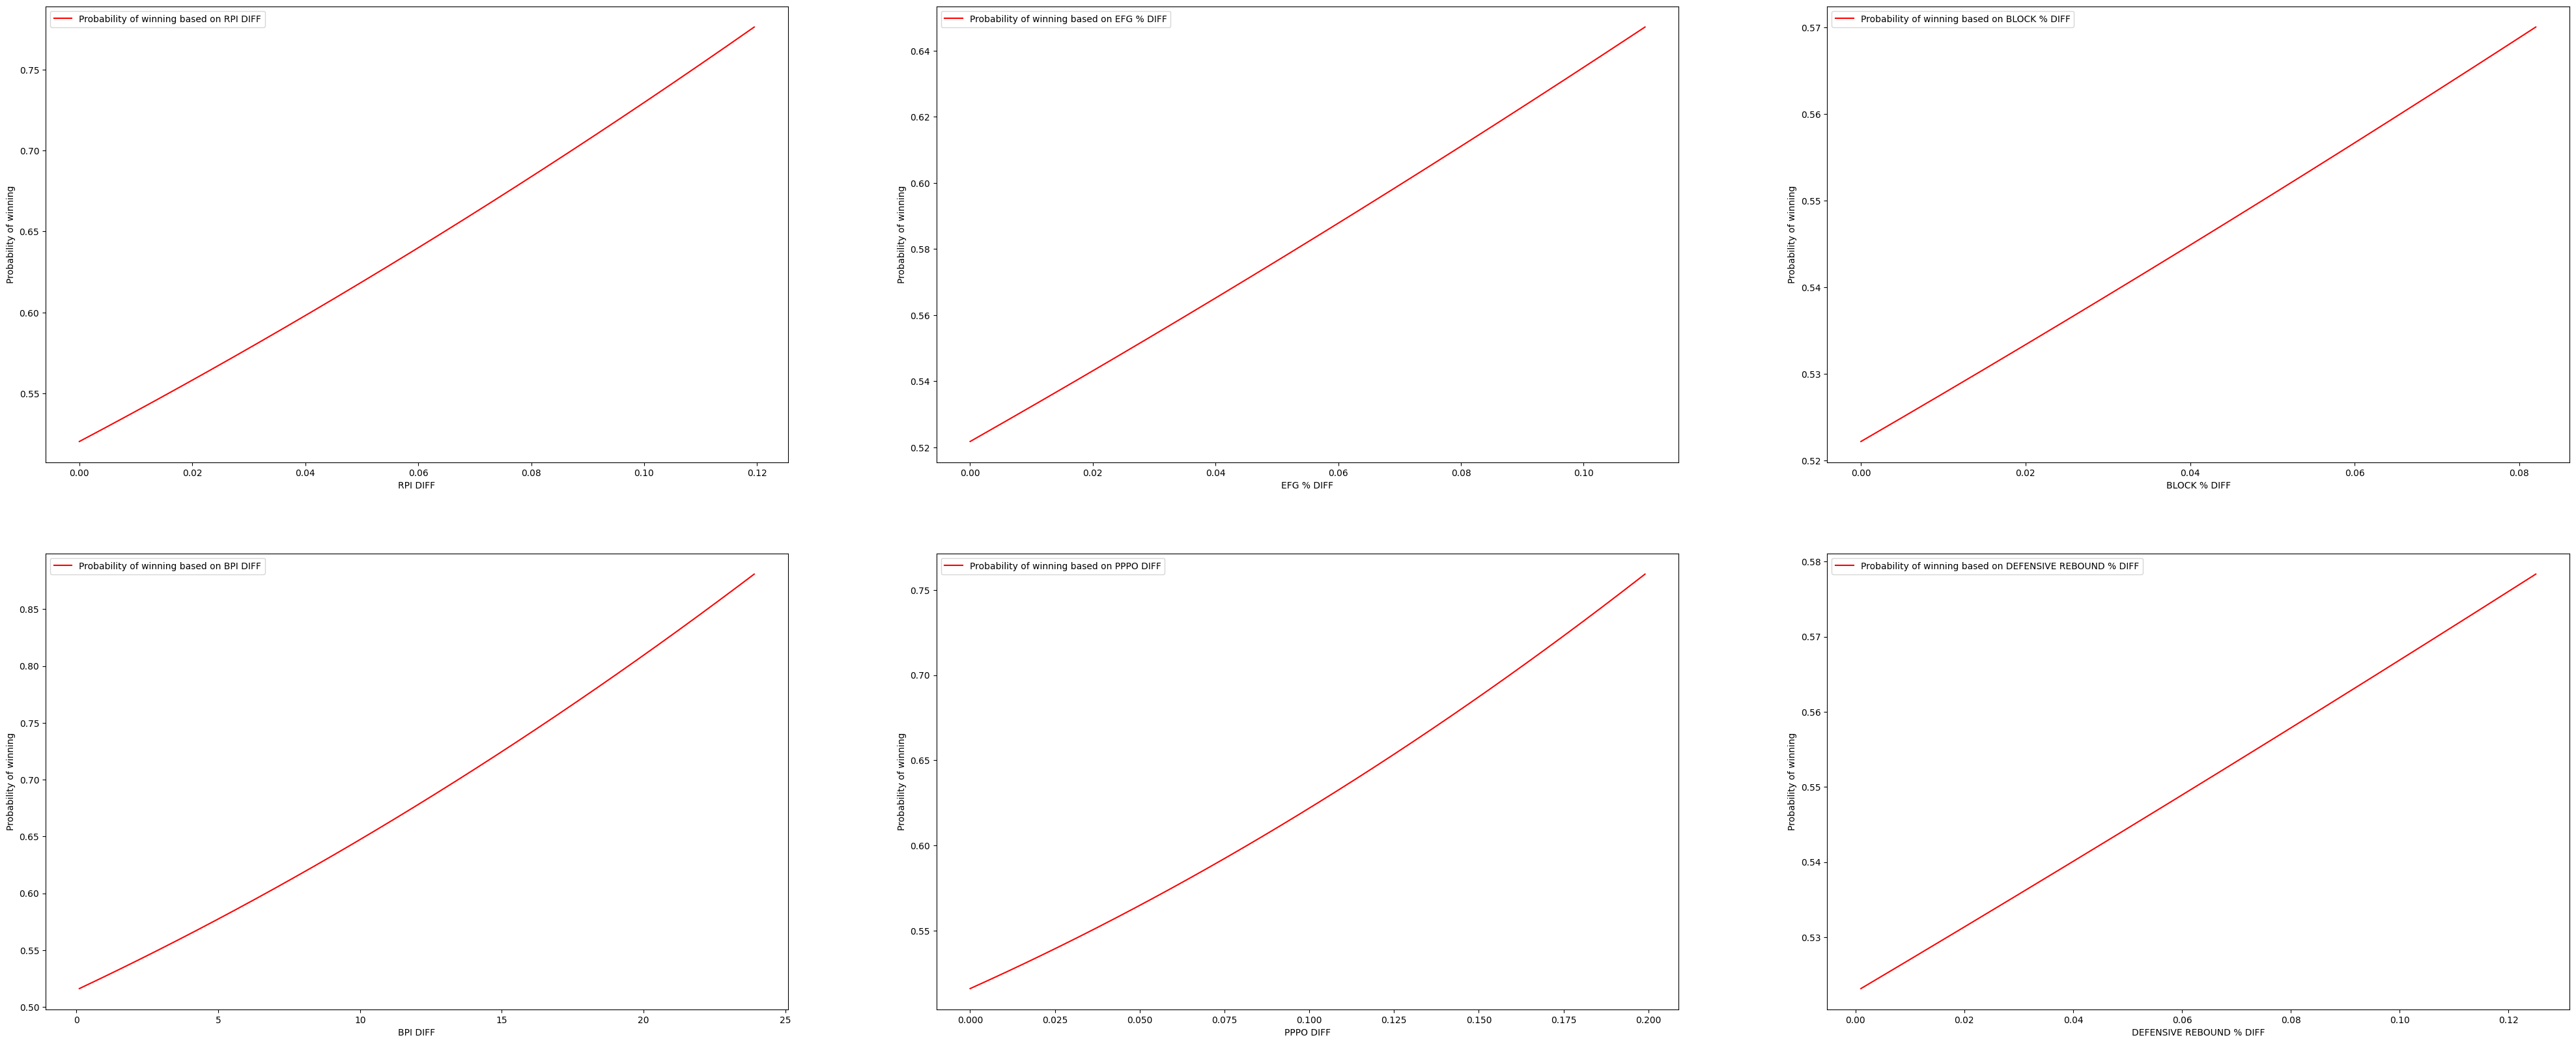

In [79]:
x_test = test_game_data.copy()

f, ax = plt.subplots(2, 3, figsize=(50, 20))
for i, (model, poly, feature) in enumerate(zip(linear_models, polys, features)):
    x_test[feature] = abs(x_test[feature])
    x = np.linspace(x_test[feature].min(), x_test[feature].max(), 1000)
    x_poly = poly.transform(x.reshape(-1, 1))
    ax[i//3, i%3].plot(x, model.predict(x_poly), c='r', label='Probability of winning based on ' + feature)
    ax[i//3, i%3].legend(loc='best')
    ax[i//3, i%3].set_xlabel(feature)
    ax[i//3, i%3].set_ylabel('Probability of winning')

In [80]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: probability_linear(x, linear_models, polys, features), axis=1)
print(f'Logistic regression accuracy on training data: {log_loss(random_matchups["TEAM 1 WIN"], random_matchups["PREDICTED TEAM 1 WIN"])}')
print(random_matchups.sample(10)[['TEAM 1', 'TEAM 2', 'PREDICTED TEAM 1 WIN', 'TEAM 1 WIN']])

Logistic regression accuracy on training data: 0.6754492548323023
                TEAM 1               TEAM 2  PREDICTED TEAM 1 WIN  TEAM 1 WIN
6262            Hawaii             Oklahoma              0.492206           0
3742           Arizona             Colorado              0.565385           1
8916          Virginia            Wisconsin              0.599906           1
3682               VCU              Belmont              0.512838           1
5323  North Dakota St.              Gonzaga              0.442131           0
5914          Oklahoma               Baylor              0.540213           1
4704         Creighton  Louisiana Lafayette              0.586154           1
4447          Iowa St.               Baylor              0.530661           1
6717         Villanova               Butler              0.554262           0
6553        Providence            Villanova              0.470003           0


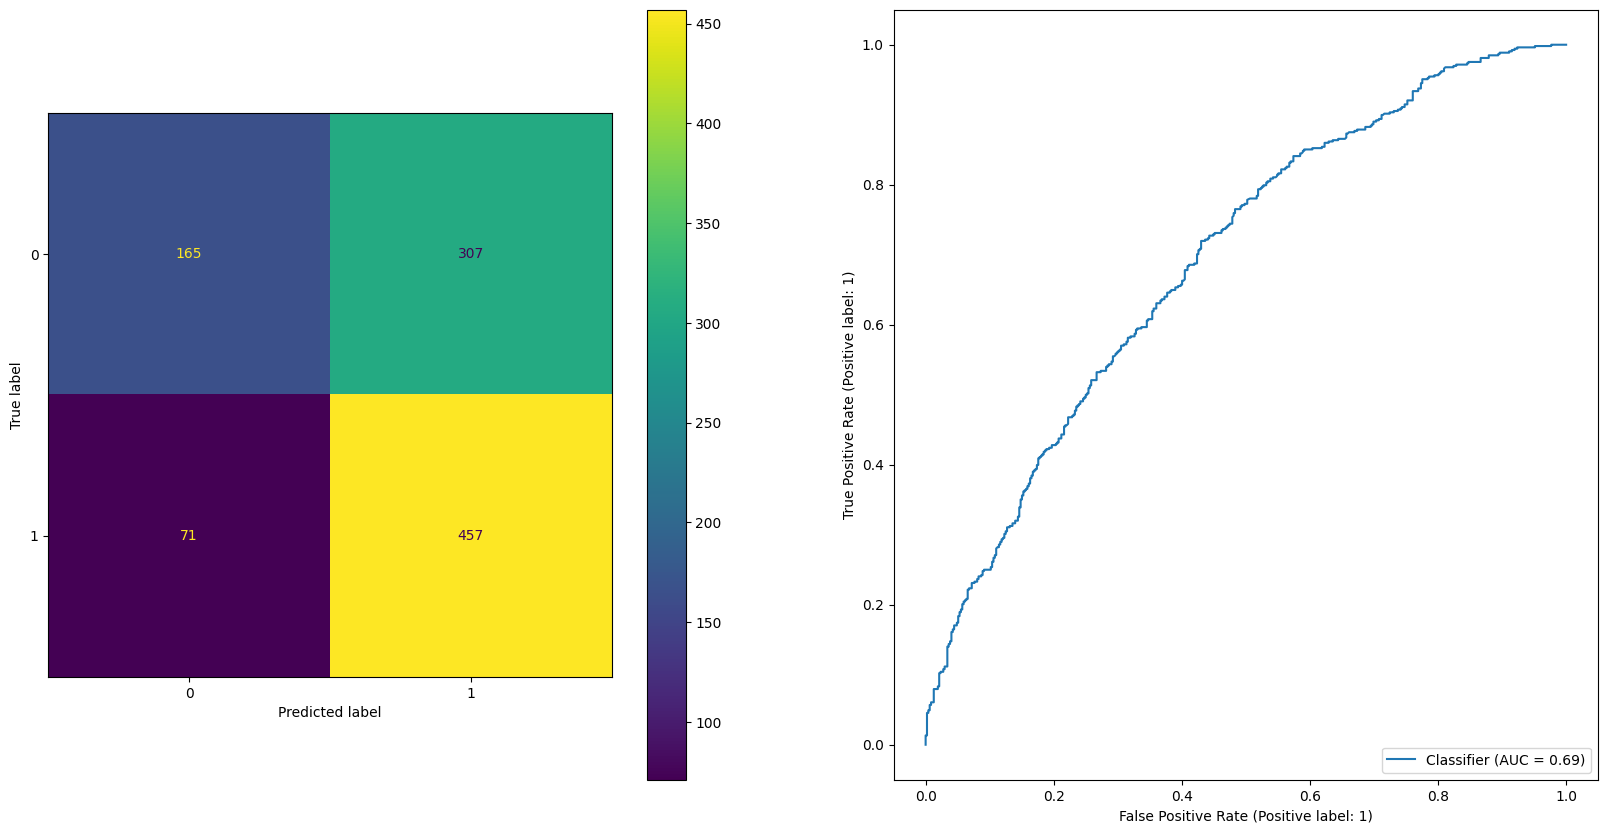

In [88]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: probability_linear(x, linear_models, polys, features), axis=1)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'] > 0.5, ax=ax[0])
RocCurveDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'], ax=ax[1])

## Novi pristup rješavanja problema

Kao što je spomenuto u prethodnom odlomku, pristup rješavanja problema u samome radu nije dovoljno dobar. U ovom odlomku ćemo pokušati poboljšati pristup rješavanja problema.

### Korištenje klasifikacijskog modela Logističke regresije

Prvi pristup koji ćemo isprobati je korištenje klasifikacijskog modela logističke regresije. Ovaj model je idealan za ovaj problem jer je izlaz modela binarna varijabla koja predstavlja pobjedu odnosno poraz ekipe `TEAM 1`.

In [83]:
features = ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF']
win_data = merged_data[merged_data['TEAM 1 WIN'] == 1].sample(n=4000)
loss_data = merged_data[merged_data['TEAM 1 WIN'] == 0].sample(n=4000)
train_data = pd.concat([win_data, loss_data])
np.random.shuffle(train_data.values)

poly_logistic = PolynomialFeatures(degree=2).fit(train_data[features])
logistic_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, C=0.1).fit(poly_logistic.transform(train_data[features]), train_data['TEAM 1 WIN'])

In [84]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: logistic_model.predict_proba(poly_logistic.transform(x[features].values.reshape(1, -1)))[0][1], axis=1)
print(f'Logistic regression (multivariate) accuracy on training data: {log_loss(random_matchups["TEAM 1 WIN"], random_matchups["PREDICTED TEAM 1 WIN"])}')
print(random_matchups.sample(10)[['TEAM 1', 'TEAM 2', 'PREDICTED TEAM 1 WIN', 'TEAM 1 WIN']])

Logistic regression (multivariate) accuracy on training data: 0.6088146099878293
                  TEAM 1        TEAM 2  PREDICTED TEAM 1 WIN  TEAM 1 WIN
7009         Wichita St.  Michigan St.              0.681213           0
492       Saint Joseph's        Temple              0.562285           0
10196             Purdue         Texas              0.574766           1
7498          Cincinnati       Buffalo              0.792333           1
10056          Villanova    Providence              0.678109           1
5608       West Virginia      Oklahoma              0.440155           0
8689           Wisconsin        Oregon              0.575550           0
3314        Colorado St.       Montana              0.496685           1
5420                 LSU      Kentucky              0.105700           0
2095   Northern Colorado       Arizona              0.213039           0


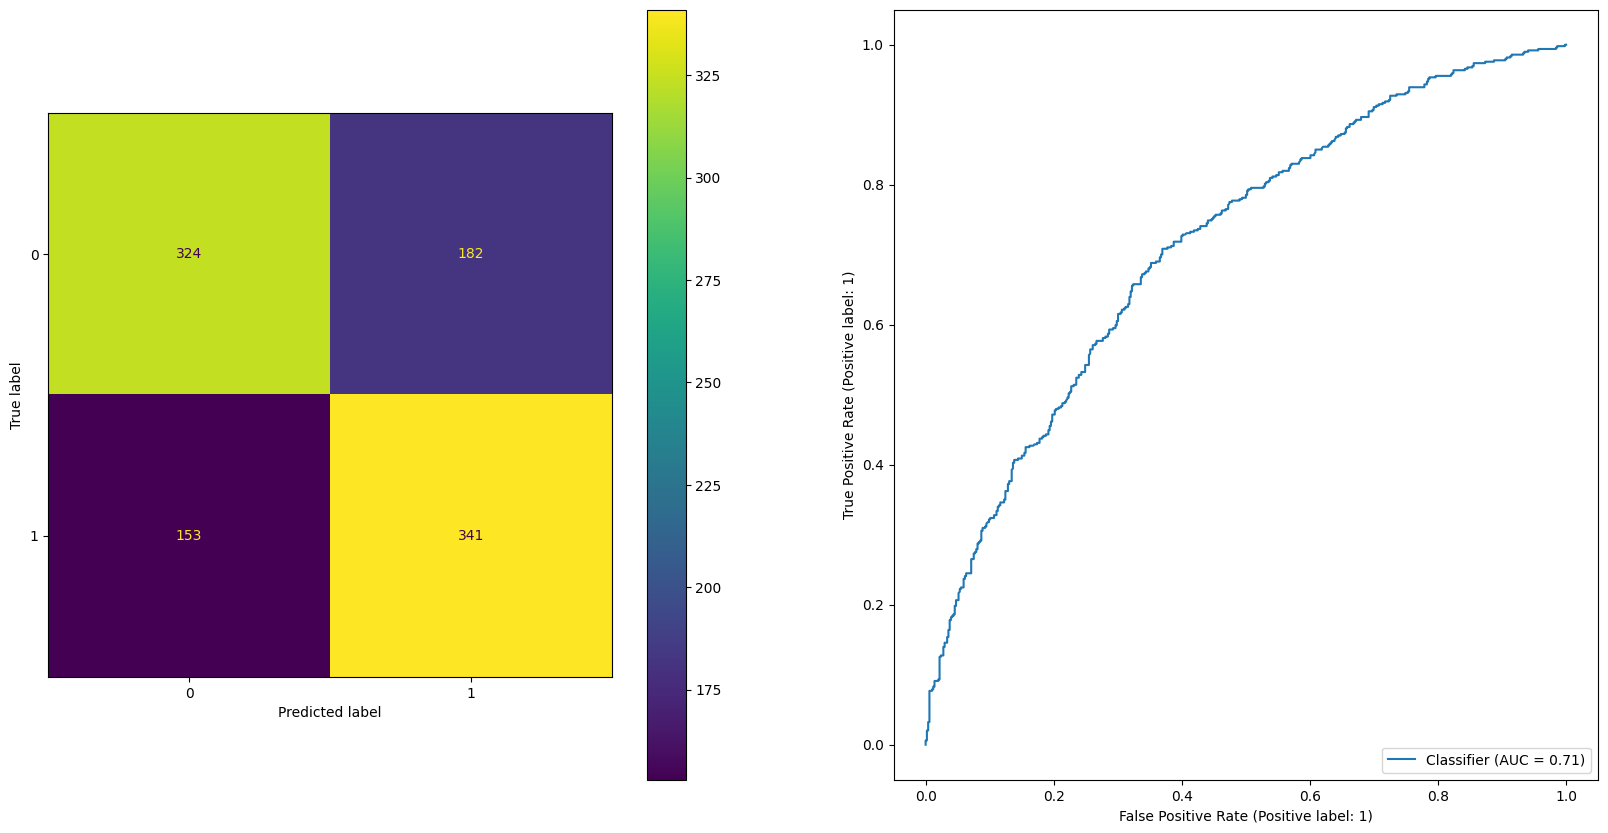

In [89]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: logistic_model.predict_proba(poly_logistic.transform(x[features].values.reshape(1, -1)))[0][1], axis=1)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'] > 0.5, ax=ax[0])
RocCurveDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'], ax=ax[1])

Nažalost, i u ovom slučaju dobivamo rezultate koji su daleko od zadovoljavajućih i malo bolji od nasumičnog odabira. Razlog tome može biti do odabira značajki ili njihovo izračunavanje, no to se može ispitati nekom drugom prilikom. Možemo uočiti da u ovom slučaju, za razliku od modela s linearnim regresijama, model daje jednako raspodjeljene predikcije za pobjedu i za poraz, tj. ne nagađa više pobjeda ili poraza.

### Korištenje klasifikacijskog Ansambla modela logističkih regresija

Drugi pristup koji ćemo isprobati je korištenje klasifikacijskog Ansambla modela logističkih regresija. Ova metoda slična je onoj obrađenoj u radu, no umjesto da koristimo modele linearne regresije, koristit ćemo modele logističke regresije, koji su idealniji za ovaj problem.

In [91]:
def winner_logistic(test_data, models, polys, features):
    prob = []

    for model, poly, feature in zip(models, polys, features):
        X_test = np.array(test_data[feature]).reshape(-1, 1)
        X_test_poly = poly.transform(X_test)
        prob.append(model.predict_proba(X_test_poly)[0][1])

    return np.mean(prob)

features = ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF']
win_data = merged_data[merged_data['TEAM 1 WIN'] == 1].sample(n=4000)
loss_data = merged_data[merged_data['TEAM 1 WIN'] == 0].sample(n=4000)
train_data = pd.concat([win_data, loss_data])
np.random.shuffle(train_data.values)

polys = []
logistic_models = []


for v in features:
    poly = PolynomialFeatures(degree=2)
    X_train = train_data[v].values.reshape(-1, 1)
    X_train_poly = poly.fit_transform(X_train)
    
    log_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, C=0.1)
    log_model.fit(X_train_poly, train_data['TEAM 1 WIN'])

    polys.append(poly)
    logistic_models.append(log_model)

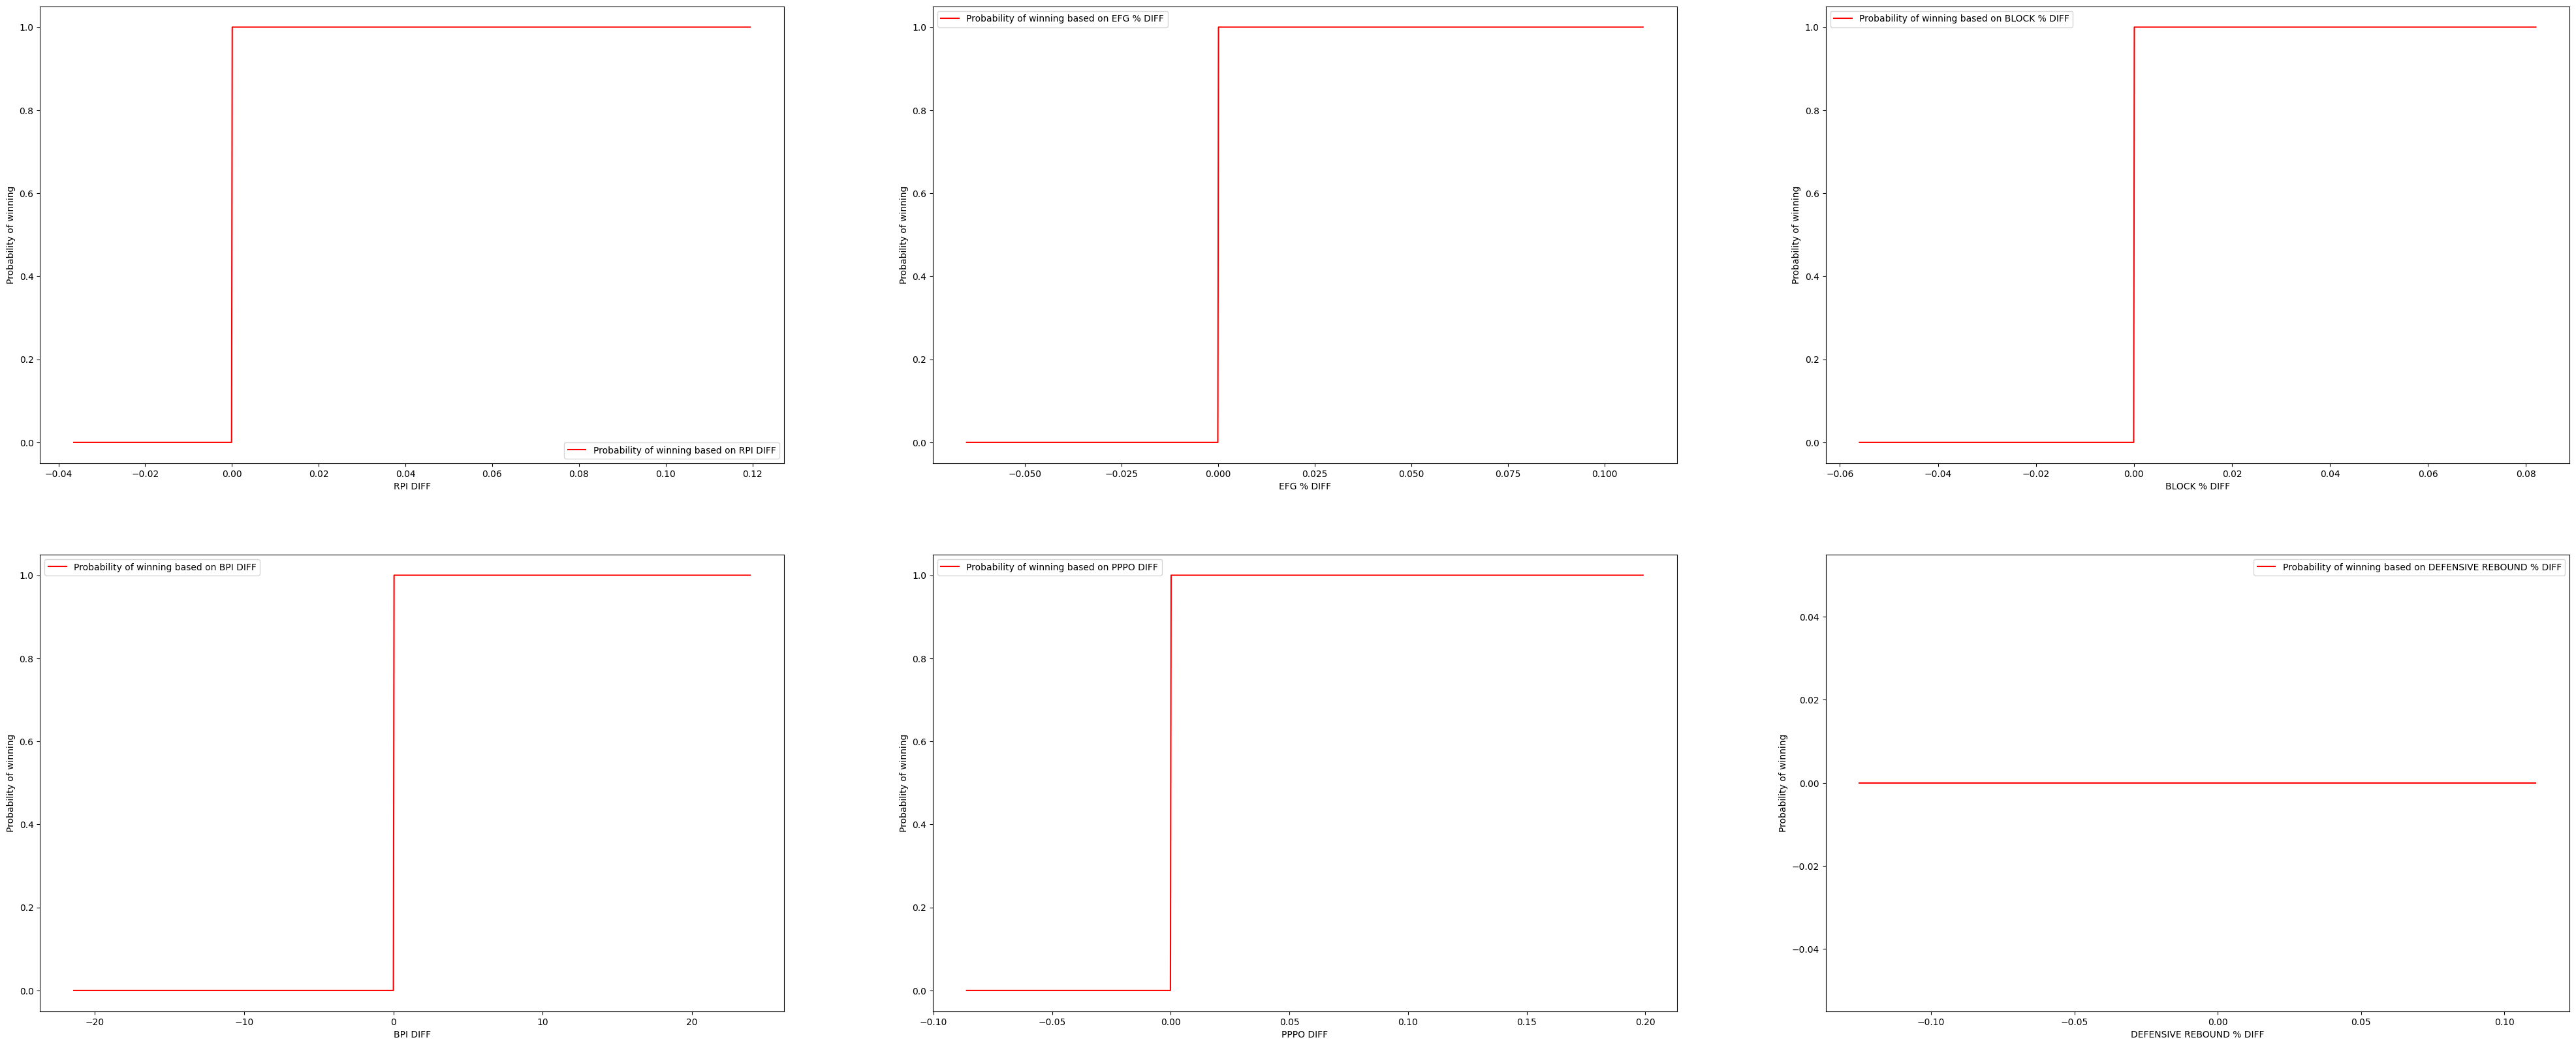

In [92]:
x_test = test_game_data.copy()

f, ax = plt.subplots(2, 3, figsize=(50, 20))
for i, (model, poly, feature) in enumerate(zip(logistic_models, polys, ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF'])):
    x_test[feature] = x_test[feature]
    x = np.linspace(x_test[feature].min(), x_test[feature].max(), 1000)
    x_poly = poly.transform(x.reshape(-1, 1))
    ax[i//3, i%3].plot(x, model.predict(x_poly), c='r', label='Probability of winning based on ' + feature)
    ax[i//3, i%3].legend(loc='best')
    ax[i//3, i%3].set_xlabel(feature)
    ax[i//3, i%3].set_ylabel('Probability of winning')

In [93]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: winner_logistic(x, logistic_models, polys, features), axis=1)
print(f'Logistic regression accuracy on training data: {log_loss(random_matchups["TEAM 1 WIN"], random_matchups["PREDICTED TEAM 1 WIN"])}')
print(random_matchups.sample(10)[['TEAM 1', 'TEAM 2', 'PREDICTED TEAM 1 WIN', 'TEAM 1 WIN']])

Logistic regression accuracy on training data: 0.6534182102557954
              TEAM 1         TEAM 2  PREDICTED TEAM 1 WIN  TEAM 1 WIN
5624   West Virginia   Oklahoma St.              0.525117           1
2064       Minnesota      Wisconsin              0.474056           1
369   Saint Joseph's       Oklahoma              0.518576           0
5873   San Diego St.        Wyoming              0.513240           1
809      Chattanooga    Connecticut              0.443940           0
3760      New Mexico   Colorado St.              0.500647           1
6317        Miami FL     Pittsburgh              0.533343           1
9576    Oklahoma St.  West Virginia              0.498521           1
4179        Iowa St.       Oklahoma              0.531106           0
7696            UMBC     Kansas St.              0.476037           0


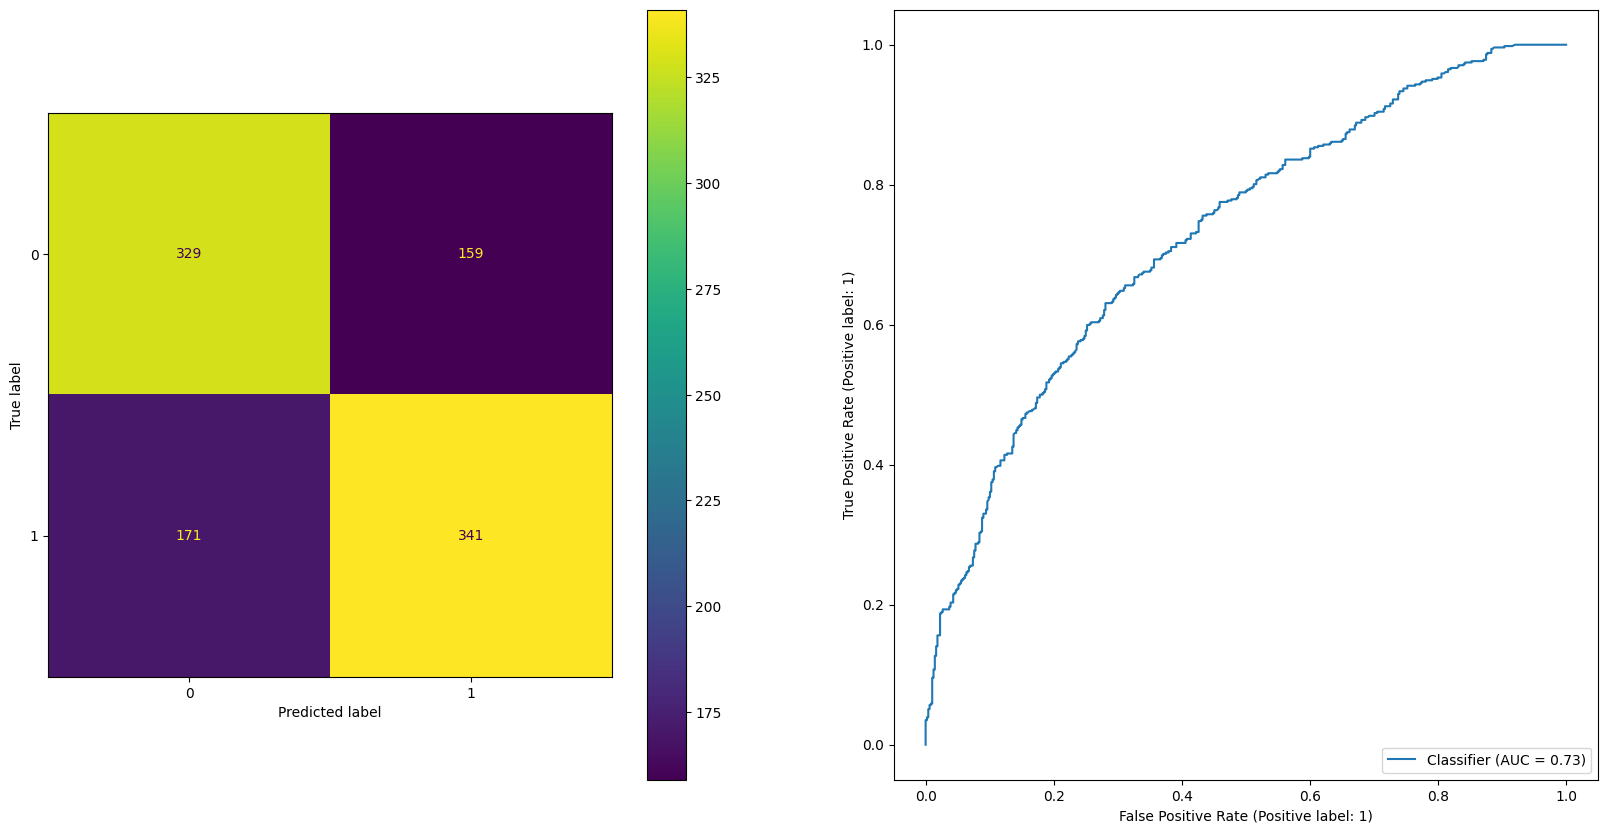

In [94]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: winner_logistic(x, logistic_models, polys, features), axis=1)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'] > 0.5, ax=ax[0])
RocCurveDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'], ax=ax[1])

Opet, rezulati dobiveni ovom metodom su se malo poboljšali, ali i dalje nisu dovoljno zadovoljavajući.

## Ispitivanje neparametarskih modela

### Korištenje Boosting modela

Kao predzadnji pristup, isprobati ćemo korištenje Boosting modela. Boosting modeli su modeli koji se sastoje od više slabih modela koji se treniraju na podskupovima podataka, a zatim se njihovi izlazi kombiniraju kako bi se dobio izlaz konačnog modela, na samome kraju slijedno učimo algoritam na pogreškama prethodnih algoritama. Ova metoda je slična onoj obrađenoj u radu, no umjesto da koristimo modele linearne regresije, u Boostingu se koriste modeli bazirani na stablima odlučivanja (decision stumps), a sama distribucija korištenih podataka s kojima se uči model se mijenja s obzirom na to koliko model pogriješi na kojem podatku, time model uči na "problematičnim" podacima.

In [96]:
from sklearn.ensemble import HistGradientBoostingClassifier

features = ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF', 'TEAM 1 WIN']
win_data = merged_data[merged_data['TEAM 1 WIN'] == 1].sample(n=4000)
loss_data = merged_data[merged_data['TEAM 1 WIN'] == 0].sample(n=4000)
train_data = pd.concat([win_data, loss_data])
np.random.shuffle(train_data.values)
train_data = train_data[features]

hist_gradient_boosting = HistGradientBoostingClassifier(max_iter=1000, learning_rate=0.1, max_depth=4)
hist_gradient_boosting.fit(train_data[features[:-1]], train_data['TEAM 1 WIN'])

HistGradientBoostingClassifier(max_depth=4, max_iter=1000)

In [107]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: hist_gradient_boosting.predict_proba(x[features[:-1]].values.reshape(1, -1))[0][1], axis=1)
print(f'Random forrest loss on training data: {log_loss(random_matchups["TEAM 1 WIN"], random_matchups["PREDICTED TEAM 1 WIN"])}')
print(random_matchups.sample(10)[['TEAM 1', 'TEAM 2', 'PREDICTED TEAM 1 WIN', 'TEAM 1 WIN']])

Random forrest loss on training data: 0.4504270045158551
                 TEAM 1              TEAM 2  PREDICTED TEAM 1 WIN  TEAM 1 WIN
5446     North Carolina          Louisville              0.430590           0
2149         Notre Dame          Cincinnati              0.704372           1
680             Indiana           Wisconsin              0.134934           0
7261                SMU                 USC              0.634794           0
2696         Vanderbilt           Tennessee              0.350125           0
8182          Creighton              Xavier              0.314914           0
3814           Iowa St.  Florida Gulf Coast              0.684407           1
2398     North Carolina           Marquette              0.774823           1
94           Notre Dame         Connecticut              0.416509           0
6592  Stephen F. Austin       West Virginia              0.681925           1


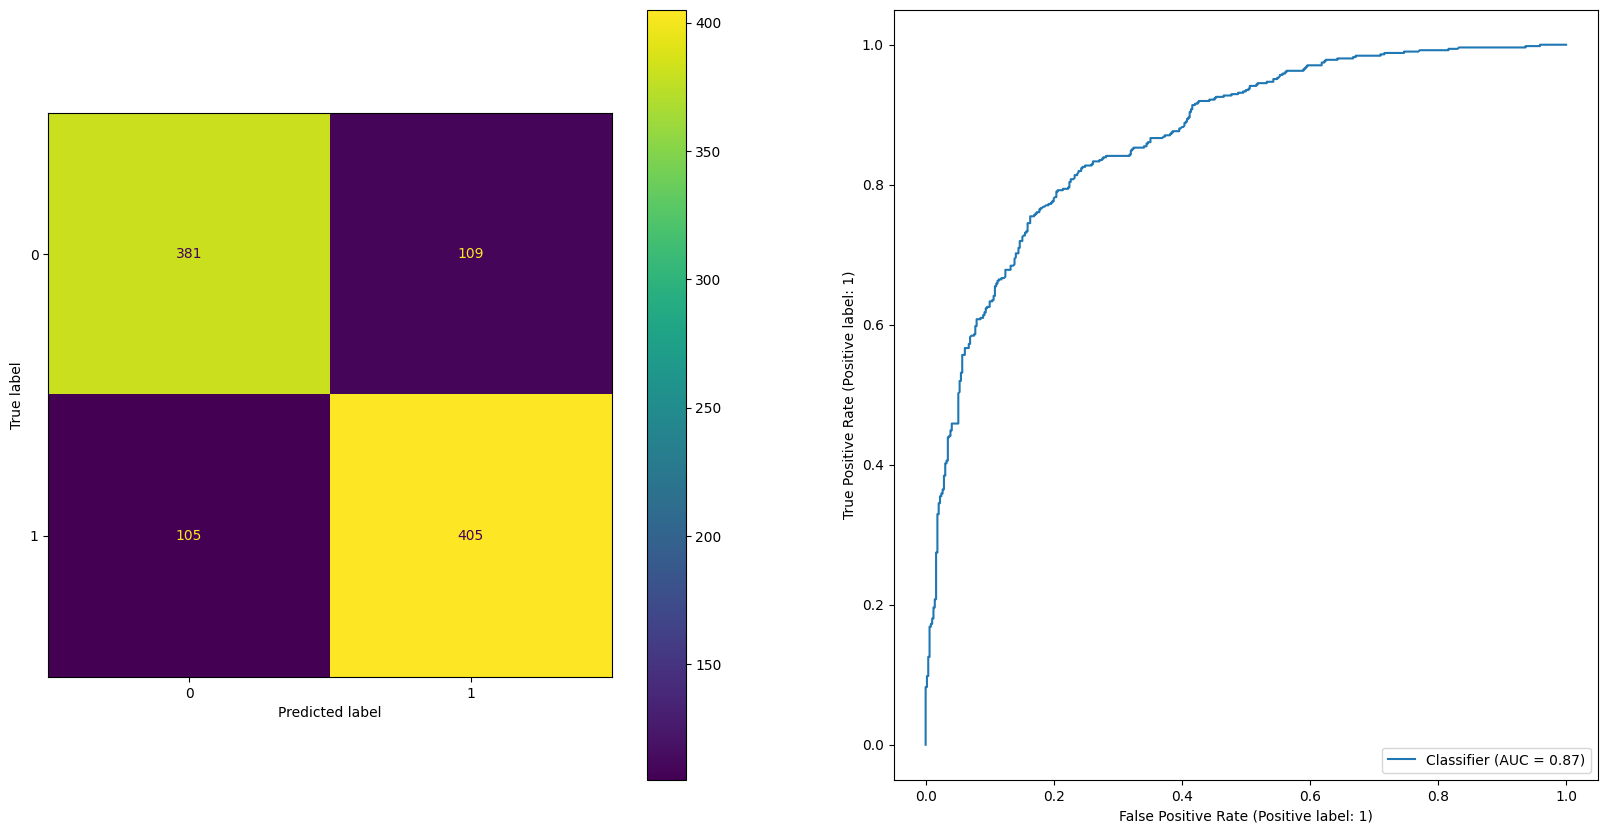

In [108]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: hist_gradient_boosting.predict_proba(x[features[:-1]].values.reshape(1, -1))[0][1], axis=1)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'] > 0.5, ax=ax[0])
RocCurveDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'], ax=ax[1])

U ovom slučaju već možemo uočiti daleko veće poboljšanje rezultata, pri čemu ovi rezultati već postaju daleko prihvatljivi jer pokazuju značajnu prediktivnu moć.

### Korištenje k-NN modela

Za kraj ćemo isprobati korištenje neparametarskog k-NN modela. Ova metoda daleko se razlikuje od do sada obrađenih metoda. Ova metoda je neparametarska metoda koja se sastoji od dva koraka:
- Učenje: Učenje se sastoji od spremanja svih primjera iz skupa podataka.
- Predviđanje: Predviđanje se sastoji od pronalaska k najbližih primjera novom primjeru te određivanja izlaza na temelju izlaza tih k najbližih primjera.

Iskoristit ćemo to svojstvo usporedbe k-NN modela da predvidimo pobjednika utakmice. Iako ovakav model nema pravi probabilistički izlaz, model pružan iz biblioteke sklearn nam nudi tu mogućnost, a način izračuna vjerojatnosti je vjerojatno postotak susjeda koji su pobjedili.

In [117]:
from sklearn.neighbors import KNeighborsClassifier

features = ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF', 'TEAM 1 WIN']
win_data = merged_data[merged_data['TEAM 1 WIN'] == 1].sample(n=4000)
loss_data = merged_data[merged_data['TEAM 1 WIN'] == 0].sample(n=4000)
train_data = pd.concat([win_data, loss_data])
np.random.shuffle(train_data.values)
train_data = train_data[features]

knn = KNeighborsClassifier(n_neighbors=500)
knn.fit(train_data[features[:-1]], train_data['TEAM 1 WIN'])

KNeighborsClassifier(n_neighbors=500)

In [118]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: knn.predict_proba(x[features[:-1]].values.reshape(1, -1))[0][1], axis=1)
print(f'Random forrest loss on training data: {log_loss(random_matchups["TEAM 1 WIN"], random_matchups["PREDICTED TEAM 1 WIN"])}')
print(random_matchups.sample(10)[['TEAM 1', 'TEAM 2', 'PREDICTED TEAM 1 WIN', 'TEAM 1 WIN']])

Random forrest loss on training data: 0.6054712997713512
              TEAM 1           TEAM 2  PREDICTED TEAM 1 WIN  TEAM 1 WIN
9294        Illinois             Ohio                 0.842           1
8559    Michigan St.        Minnesota                 0.820           1
9113          Baylor         Hartford                 0.836           1
6315             VCU       Oregon St.                 0.618           1
5489  Texas Southern     Michigan St.                 0.148           1
8581             LSU  Mississippi St.                 0.474           1
4587       Tennessee          Florida                 0.346           0
38             Texas      Austin Peay                 0.842           1
4287         Montana         Syracuse                 0.140           0
7376      Notre Dame    West Virginia                 0.392           0


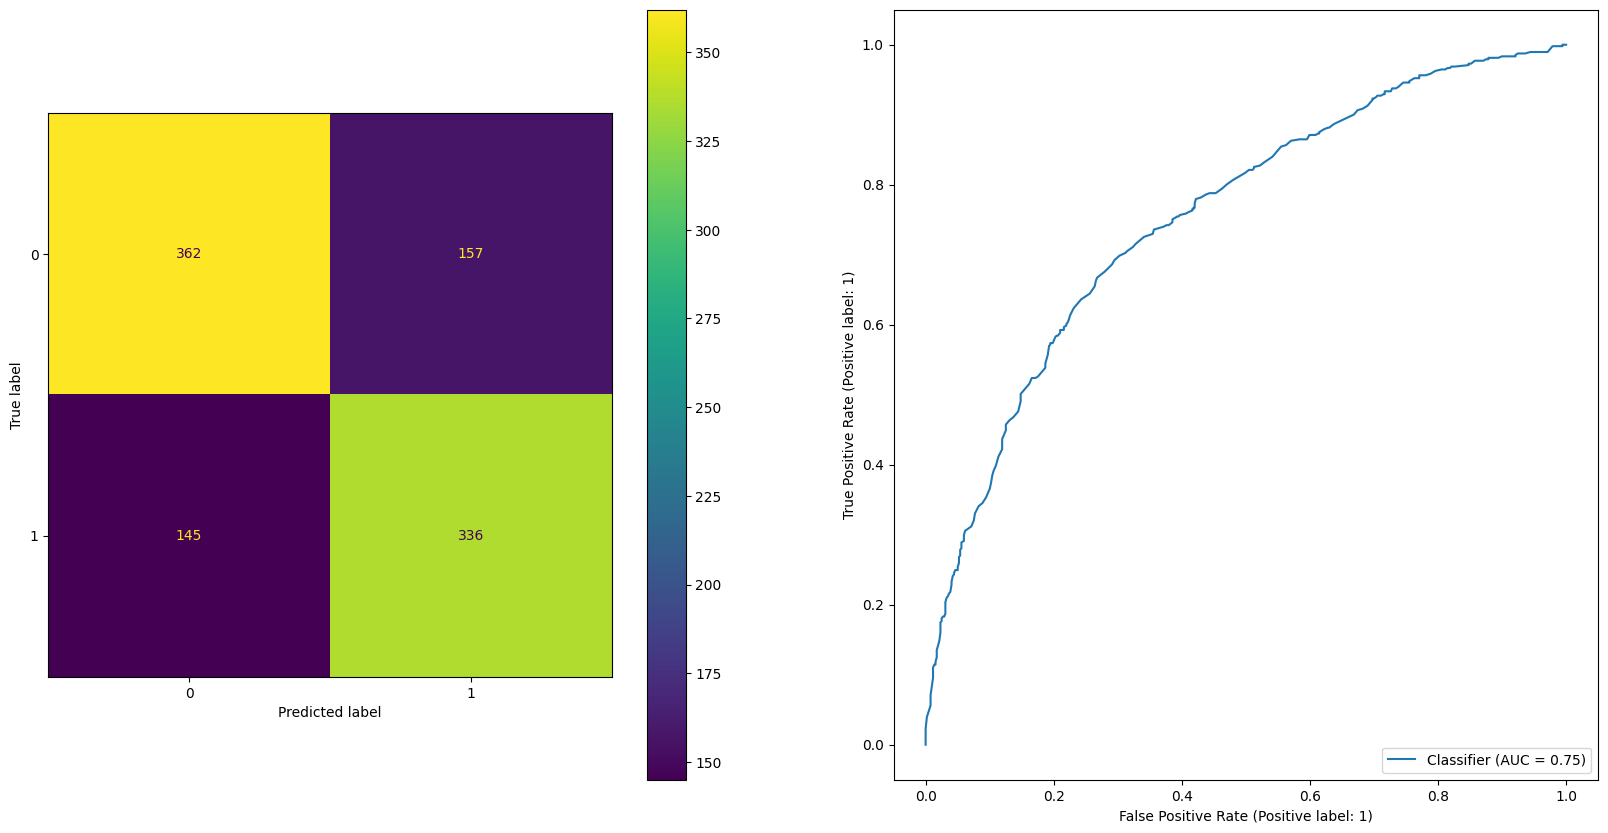

In [119]:
random_matchups = merged_data.sample(n=1000).copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: knn.predict_proba(x[features[:-1]].values.reshape(1, -1))[0][1], axis=1)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'] > 0.5, ax=ax[0])
RocCurveDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'], ax=ax[1])

Opet, kao i kod gradient boosting modela, možemo uočiti daleko veće poboljšanje rezultata. Ovi rezulati su već zadovoljavajući i mogu se koristiti za predviđanje pobjednika utakmica.

## Zaključak

Problem predviđanja pobjednika utakmice nije jednostavan problem, zahtjeva poznavanje domene i više istraživanja i ispitivanja značajnosti pojedinih statistika izračunatih za određene ekipe. Također, uz sve poznate podatke, izostavljena je mogućnost 'underdog' ekipa da pobijede favoriziranu ekipu, što je u sportu nije rijedak slučaj.

U ovom radu isprobali smo nekoliko pristupa rješavanja problema, no samo oni neparametarski modeli su davali značajnije rezultate zbog svoje jednostavnije prirode koja najviše dolikuje onoj kojima i sami ljudi donose odluke. 

Razlog slabijih rezultata kod parametarskih modela može biti u podacima, koji možda nisu dovoljno reprezentativni, ili pri odabiru značajki koje su u radu odabrane, a nije ni pokazano kako su došli do zaključaka o njihovim statističkim utjecajima, no to se može ispitati nekom drugom prilikom. 

U svakom slučaju, problem predviđanja pobjednika March Madness-a nije jednostavan za rješavanje i zahtjeva puno više istraživanja i ispitivanja kako bi se došlo do zadovoljavajućih rezultata.
